In [1]:
import sys
import torch
import global_variables as gv
import sys
import numpy as np
import matplotlib.pyplot as plt
import configparser
# from FACTS_Modules.Model import model_factory
from FACTS_Modules.util import string2dtype_array
from FACTS_Modules.TADA import MakeGestScore
from facts_visualizations import single_trial_plots, multi_trial_plots
import os 
import pdb
#import seaborn as sns

from sbi.inference import infer, SNPE, prepare_for_sbi, simulate_for_sbi
from sbi import utils as utils
import pickle
import scipy.io

from scipy.interpolate import interp1d
import re


from FACTS_Modules.TaskSFCLaw import TaskSFCLaw_with_noise, TaskSFCLaw
from FACTS_Modules.AcousticSynthesis import AcousticSynthesis
import numpy as np
import pdb

from FACTS_Modules.LWPR_Model.lwpr import LWPR
from abc import ABC, abstractmethod

from FACTS_Modules import util
from FACTS_Modules import seutil

import pandas as pd
import seaborn as sns
from scipy import stats
import math

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
all_eps = []
all_prediction_errors = []
all_P = []
all_Q = []
all_R = []
all_Pobvs = []
all_formant_with_noise = []

def FACTS(theta):
    ini='DesignC_AUKF_onlinepertdelay_SBI_Al.ini'
    # gFile='GesturalScores/KimetalOnlinepert.G'
    gFile='GesturalScores/KimetalOnlinepert2.G'
    config = configparser.ConfigParser()
    config.read(ini)
    # print('DEBUGG')
    # Replace the parameter value from ini file
    #pdb.set_trace()
    # try:
    if theta.dim() > 1:
#             pdb.set_trace()
        #print(theta.numel())
        config['TaskStateEstimator']['Auditory_sensor_scale_est'] = str(theta[0][0].item())
        config['ArticStateEstimator']['Somato_sensor_scale_est'] = str(theta[0][1].item())
        
        config['TaskStateEstimator']['process_scale'] = str(theta[0][2].item())
        config['ArticStateEstimator']['process_scale'] = str(theta[0][3].item())
        
        config['TaskStateEstimator']['Auditory_delay']  = str(theta[0][4].item())
        config['ArticStateEstimator']['Somato_delay']  = str(theta[0][5].item())
        
        config['Gesture']['Spring_constant'] = str(theta[0][6].item())
        
        config['TaskStateEstimator']['artic_to_task_noise_scale'] = str(theta[0][7].item())
        
#         config['TaskSFCLaw']['noise_scale'] = str(theta[0][4].item())
#         config['ArticSFCLaw']['noise_scale'] = str(theta[0][5].item())
        
#         config['TaskStateEstimator']['AUKF_gain_for_pert'] = str(theta[0][2].item())
#         config['TaskStateEstimator']['AUKF_eps_window'] = str(theta[0][3].item())
#         config['TaskStateEstimator']['AUKF_gain_attenuation'] = str(theta[0][7].item())
        
        
#         config['TaskStateEstimator']['covariance_scale'] = str(theta[0][2].item())
#         config['ArticStateEstimator']['covariance_scale'] = str(theta[0][3].item())
        
#         if len(theta) > 4:
#             config['TaskStateEstimator']['artic_to_task_noise_scale'] = str(theta[0][5].item())
            #config['ArticKinematics']['plant_scale'] = str(theta[0][5].item())
        
        
#         config['TaskStateEstimator']['covariance_scale'] = str(theta[0][7].item())
#         config['ArticStateEstimator']['covariance_scale'] = str(theta[0][8].item())
        
#         config['SensoryDelay']['Auditory_delay'] = str(theta[0][4].item())
#         config['SensoryDelay']['Somato_delay'] = str(theta[0][5].item())
        
#         config['TaskStateEstimator']['AUKF_Rmult_for_pert'] = str(theta[0][6].item()) # Let these two be the same based on MS and ablation analysis
#         config['TaskStateEstimator']['AUKF_Qmult_for_pert'] = str(theta[0][6].item()) # Let these two be the same based on MS and ablation analysis
#         config['TaskStateEstimator']['AUKF_Pmult_for_pert'] = str(theta[0][7].item())
        
#         config['SensoryDelay']['Somato_delay'] = str(theta[0][7].item())

#         config['TaskStateEstimator']['AUKF_learning_rate_R'] = str(theta[0][8].item()) # Let these two be the same based on MS and ablation analysis
#         config['TaskStateEstimator']['AUKF_learning_rate_Q'] = str(theta[0][8].item()) # Let these two be the same based on MS and ablation analysis
        
#         config['TaskStateEstimator']['AUKF_learning_rate_P'] = str(theta[0][9].item())

#         config['TaskStateEstimator']['sensory_error_threshold'] = str(theta[0][10].item())
        
        
    else:
        #pdb.set_trace()
        config['TaskStateEstimator']['Auditory_sensor_noise_scale_est'] = str(theta[0].item())
        config['ArticStateEstimator']['Somato_sensor_noise_scale_est'] = str(theta[1].item())
        
        config['TaskStateEstimator']['process_scale'] = str(theta[2].item())
        config['ArticStateEstimator']['process_scale'] = str(theta[3].item())
        
        config['TaskStateEstimator']['Auditory_delay']  = str(theta[4].item())
        config['ArticStateEstimator']['Somato_delay']  = str(theta[5].item())
        
        config['Gesture']['Spring_constant'] = str(theta[6].item())
        
        config['TaskStateEstimator']['artic_to_task_noise_scale'] = str(theta[7].item())
        
#         config['SensoryNoise']['Auditory_sensor_scale'] = str(theta[3].item())
#         config['SensoryNoise']['Somato_sensor_scale'] = str(theta[4].item())
        
#         config['TaskStateEstimator']['artic_to_task_noise_scale'] = str(theta[3].item())
        
#         config['TaskSFCLaw']['noise_scale'] = str(theta[4].item())
#         config['ArticSFCLaw']['noise_scale'] = str(theta[5].item())
        
#         config['TaskStateEstimator']['AUKF_gain_for_pert'] = str(theta[2].item())
#         config['TaskStateEstimator']['AUKF_eps_window'] = str(theta[3].item())
#         config['TaskStateEstimator']['AUKF_gain_attenuation'] = str(theta[7].item())
        
#         config['TaskStateEstimator']['covariance_scale'] = str(theta[2].item())
#         config['ArticStateEstimator']['covariance_scale'] = str(theta[3].item())
        

        
#         if len(theta) > 4:
#             config['TaskStateEstimator']['artic_to_task_noise_scale'] = str(theta[4].item())
            #config['ArticKinematics']['plant_scale'] = str(theta[5].item())

#         config['TaskStateEstimator']['covariance_scale'] = str(theta[7].item())
#         config['ArticStateEstimator']['covariance_scale'] = str(theta[8].item())

#         config['SensoryDelay']['Auditory_delay'] = str(theta[4].item())
#         config['SensoryDelay']['Somato_delay'] = str(theta[5].item())
        
#         config['TaskStateEstimator']['AUKF_Rmult_for_pert'] = str(theta[6].item()) # Let these two be the same based on MS and ablation analysis
#         config['TaskStateEstimator']['AUKF_Qmult_for_pert'] = str(theta[6].item()) # Let these two be the same based on MS and ablation analysis
#         config['TaskStateEstimator']['AUKF_Pmult_for_pert'] = str(theta[7].item())

#         config['TaskStateEstimator']['AUKF_learning_rate_R'] = str(theta[8].item()) # Let these two be the same based on MS and ablation analysis
#         config['TaskStateEstimator']['AUKF_learning_rate_Q'] = str(theta[8].item()) # Let these two be the same based on MS and ablation analysis

#         config['TaskStateEstimator']['AUKF_learning_rate_P'] = str(theta[9].item())

#         config['TaskStateEstimator']['sensory_error_threshold'] = str(theta[10].item())
        

        # Note from Alvince, need to pass this in when est delay != actual delay  
#         config['SensoryDelay']['Auditory_delay']  = '165'
#         config['SensoryDelay']['Somato_delay']  = '165'

        # Note from Alvince, need to pass this in  for TSE    
        #config['TaskStateEstimator']['Auditory_delay']  = config['SensoryDelay']['Auditory_delay'] 
        #config['ArticStateEstimator']['Somato_delay']  = config['SensoryDelay']['Auditory_delay'] 

    # except Exception as e:
    #     print(e)
    #     pdb.set_trace()

    model = model_factory(config)
    #pdb.set_trace()
    if 'MultTrials' in config.sections(): 
        ntrials = int(config['MultTrials']['ntrials'])
        target_noise= float(config['MultTrials']['Target_noise'])
    else: 
        ntrials = 1
        target_noise = 0

    #pdb.set_trace()
    #print(config['ArticStateEstimator']['cc_discount_from_delay'])
    gest_name = gFile.split('/')[-1].split('/')[-1]
    np.random.seed(100)
    k = float(config['Gesture']['Spring_constant'])
    GestScore, ART, ms_frm, last_frm = MakeGestScore(gFile,target_noise, k)
    
    # initialize vectors to monitor position at each timestep
    buffer_size_auditory = int(float(config['SensoryDelay']['Auditory_delay']) / 5)  # default used to be 20
    buffer_size_somato = int(float(config['SensoryDelay']['Somato_delay']) / 5)
    buffer_size = max(buffer_size_auditory, buffer_size_somato)
    
    x_tilde_delaywindow = np.full([buffer_size,gv.x_dim*2], np.nan) #a new variable that state estimators will have a partial access to
    a_tilde_delaywindow = np.full([buffer_size,gv.a_dim*2], np.nan) #a new variable that state estimators will have a partial access to


    x_tilde_record = np.full([last_frm+buffer_size,gv.x_dim*2], np.nan) #changed
    somato_record = np.full([last_frm+buffer_size,gv.a_dim*2], np.nan) #changed
    formant_record = np.full([last_frm+buffer_size,3], np.nan) #changed
    a_tilde_record = np.full([last_frm+buffer_size,gv.a_dim*2], np.nan) #changed
    formants_produced_record = np.full([last_frm,3], np.nan)

    x_tilde_record_alltrials = np.empty([ntrials,last_frm+buffer_size,gv.x_dim]) #changed
    somato_record_alltrials = np.full([ntrials,last_frm+buffer_size,gv.a_dim*2], np.nan) #changed
    formant_record_alltrials = np.full([ntrials,last_frm+buffer_size,3], np.nan) #changed
    shift_record_alltrials = np.full([ntrials,last_frm+buffer_size,3], np.nan) #changed
    formants_produced_record_alltrials = np.full([ntrials,last_frm,3], np.nan)

    
    a_tilde_record_alltrials = np.empty([ntrials,last_frm+buffer_size,gv.a_dim])
    a_dot_record_alltrials = np.empty([ntrials,last_frm+buffer_size,gv.a_dim])
    a_dotdot_record_alltrials = np.empty([ntrials,last_frm+buffer_size,gv.a_dim])
    predict_formant_record_alltrials = np.empty([ntrials,last_frm+buffer_size,3])

    #pdb.set_trace()
    #Check if catch trials (no perturbation) are specified in the config file
    if 'CatchTrials' in config.keys():
        catch_trials = string2dtype_array(config['CatchTrials']['catch_trials'], dtype='int')
        catch_types = string2dtype_array(config['CatchTrials']['catch_types'], dtype='int')
        if len(catch_trials) != len(catch_types):
            raise Exception("Catch trial and catch type lengths not matching, please check the config file.")
    else: catch_trials = np.array([])

    #Run FACTS for each trial
    for trial in range(ntrials):
        #print("trial:", trial)
        #Gestural score (task)
        k = float(config['Gesture']['Spring_constant'])
        GestScore, ART, ms_frm, last_frm = MakeGestScore(gFile,target_noise, k=k)         #this is similar with MakeGest in the matlab version

        # initial condition
        x_tilde_delaywindow[0] = string2dtype_array(config['InitialCondition']['x_tilde_init'],'float')
        a_tilde_delaywindow[0] = string2dtype_array(config['InitialCondition']['a_tilde_init'],'float')
        x_tilde_record[0] = string2dtype_array(config['InitialCondition']['x_tilde_init'],'float')
        a_tilde_record[0] = string2dtype_array(config['InitialCondition']['a_tilde_init'],'float')
        a_actual = string2dtype_array(config['InitialCondition']['a_tilde_init'],'float')
        model.artic_sfc_law.reset_prejb() #save the initial artic-to-task model.
        all_adotdot = []

        if trial in catch_trials: catch = catch_types[np.where(catch_trials==trial)[0][0]]
        else: catch = False
        #print("catch:", catch)
        
        for i_frm in range(last_frm): #gotta change this hardcoded number to aud delay later
            #model function runs FACTS by each frame
            x_tilde_delaywindow, a_tilde_delaywindow, a_actual, somato_record, formant_record, adotdot, y_hat, formants_produced = model.run_one_timestep(x_tilde_delaywindow, a_tilde_delaywindow, a_actual, somato_record, formant_record, GestScore, ART, ms_frm, i_frm, trial, catch)
            if (formants_produced == -1).all():
                formants_produced_record[i_frm:] = [-1, -1, -1]
                a_tilde_record[i_frm:] = np.tile(-10000, 12)
                x_tilde_record[i_frm:] = np.tile(-10000, 14)
                break
            else:
                a_tilde_record[i_frm+1] = a_tilde_delaywindow[0,:] #0 is always the most recnet current frame
                x_tilde_record[i_frm+1] = x_tilde_delaywindow[0,:] #0 is always the most recnet current frame
                formants_produced_record[i_frm] = formants_produced 
                all_adotdot.append(adotdot)
            


        # x1_pred = np.array(model.task_state_estimator.all_internal_x1_prediction)
        # plt.plot(range(x1_pred.shape[0]), x1_pred)
        #pdb.set_trace()
        #P_over_time = np.array(model.task_state_estimator.all_P)
        #plt.plot(P_over_time)
        #plt.show()

        predict_formant_record_alltrials[trial,] = y_hat
        formants_produced_record_alltrials[trial,] = formants_produced_record
        
        a_tilde_record_alltrials[trial,] = a_tilde_record[:,0:gv.a_dim]
        #a_dot_record[trial, ] = a_tilde[gv.a_dim:]
        x_tilde_record_alltrials[trial,] = x_tilde_record[:,0:gv.x_dim]
        formant_record_alltrials[trial,] = formant_record
        somato_record_alltrials[trial,] = somato_record
        
        model.task_state_estimator.update(catch)

        plot_trial = False 
        if plot_trial:
            plt.figure()
            single_trial_plots('baseline', 
                                    trial, a_tilde_record_alltrials, 
                                    a_tilde_record_alltrials, formant_record_alltrials, 
                                    predict_formant_record_alltrials, x_tilde_record_alltrials, 
                                    [ini, gFile], formants_produced_record_alltrials)
            #pdb.set_trace() # Test if we can print model.
            plt.figure()
            all_Y = np.array(model.task_state_estimator.all_Y)
            plt.plot(all_Y[:,0,:])
            plt.title('Y from TSE Auditory Prediction')

            plt.figure()
            all_y = np.array(model.task_state_estimator.all_y)
            plt.plot(all_y[:,0])
            plt.title('y from TSE Auditory Prediction')
            plt.show()

            #pdb.set_trace()
            a2t_xtilde = np.array(model.task_state_estimator.artic_to_task_xtilde)
            plt.plot(a2t_xtilde)
            plt.title('artic_to_task_xtilde')
            plt.show()

            plt.figure()
            tse_delay_y = np.array(model.task_state_estimator.all_delay_y)
            plt.plot(tse_delay_y[:,0])
            plt.title('tse_delay_y')
            plt.show()

            plt.figure()
            all_formant_with_noise = np.array(model.task_state_estimator.all_formant_with_noise)
            plt.plot(all_formant_with_noise[:,0])
            plt.title('all_formant_with_noise')
            plt.show()


            plt.figure()
            all_X1 = np.array(model.task_state_estimator.all_X1)
            plt.plot(all_X1[:,:,0])
            plt.title('X1 into TSE Aud Predict')
            plt.show()

            plt.figure()
            all_adotdot = np.array(all_adotdot)
            print(all_adotdot.shape)
            plt.plot(all_adotdot)
            plt.title('adotdot')
            plt.show()

            plt.show()

        #print(f"formant_record_alltrials {formant_record_alltrials}")
        #print(f"formants_produced_record_alltrials {formants_produced_record_alltrials}")
        del x_tilde_record
        del a_tilde_record
        del formant_record
        del somato_record
    #pdb.set_trace()
    return torch.from_numpy( formants_produced_record_alltrials[:,:,0].squeeze() )



def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""


# Model.py runs all major FACTS modules. Modules that are 
# carried out in each time step are listed in the method 
# "run_one_timestep." model_factory builds FACTS based on 
# the model architecture specified in config files. 

# Under "Hierarchical_xdotdot," for example, the task 
# state estimator type is defined as lwpr. 

def model_factory(config):
    if 'ModelArchitecture' in config.keys():
        if config['ModelArchitecture']['architecture'] == 'classic': return Model(config)
        if config['ModelArchitecture']['architecture'] == 'hierarchical': return Hierarchical_Model(config)
        if config['ModelArchitecture']['architecture'] == 'hierarchical_articsfcupdate': return Hierarchical_ArticSFCUpdate_Model(config)
        if config['ModelArchitecture']['architecture'] == 'hierarchical_xdotdot': return Hierarchical_xdotdot(config)
        if config['ModelArchitecture']['architecture'] == 'hierarchical_JacUpdateDebug': return Hierarchical_JacUpdateDebug(config)
    return Model(config)


# parent class
class Model():
    def __init__(self,model_configs):
        self.task_sfc_law = TaskSFCLaw()
#         self.task_sfc_law = TaskSFCLaw_with_noise(model_configs['TaskSFCLaw'])
        self.artic_sfc_law = self.artic_sfc_law_factory(model_configs['ArticSFCLaw'])
        self.artic_kinematics = self.artic_kinematics_factory(model_configs)
        self.acoustic_synthesis = AcousticSynthesis(model_configs['AcousticSynthesis'])
        self.auditory_perturbation = self.auditory_perturbation_factory(model_configs)
        self.sensory_system_noise = self.sensory_system_noise_factory(model_configs)
        self.sensory_system_delay = self.sensory_system_delay_factory(model_configs)
        R_Auditory = self.sensory_system_noise.get_R_Auditory()
        R_Somato = self.sensory_system_noise.get_R_Somato()
        self.artic_state_estimator = self.ase_factory(model_configs,R_Auditory,R_Somato)
        self.task_state_estimator = self.tse_factory(model_configs['TaskStateEstimator'],R_Auditory,R_Somato)
        #self.state_estimator = self._state_estimator_factory(model_configs,R_Auditory,R_Somato)
        
    def run_one_timestep(self, prev_x_tilde, prev_a_tilde, prev_a_actual, GestScore, ART, ms_frm,i_frm, trial, catch):
        xdotdot, PROMACT = self.task_sfc_law.run(prev_x_tilde,GestScore,i_frm)
        adotdot = self.artic_sfc_law.run(xdotdot, prev_a_tilde,ART,i_frm,PROMACT,ms_frm)
        a_actual = self.artic_kinematics.run(prev_a_actual,adotdot,ms_frm)
        formants = self.acoustic_synthesis.run(a_actual)
        formants_shifted = self.auditory_perturbation.run(formants,i_frm,trial,catch)
        formants_noise, a_noise = self.sensory_system_noise.run(formants_shifted,a_actual)
        a_tilde, y_hat = self.artic_state_estimator.run(prev_a_tilde,adotdot,formants_noise,a_noise,ms_frm,i_frm,catch)
        x_tilde = self.task_state_estimator.run(a_tilde)

        return x_tilde, a_tilde, a_actual, formants, formants_noise, adotdot, y_hat
        
    # Factory methods
    def artic_sfc_law_factory(self,configs):
        model_type = configs['model_type']
        #print('Artic SFC Law Model Type: ', model_type)
        if model_type == 'lwpr':
#             from FACTS_Modules.ArticSFCLaw import ArticSFCLaw_LWPR_noupdate
#             artic_sfc_law = ArticSFCLaw_LWPR_noupdate(configs)
            from FACTS_Modules.ArticSFCLaw import ArticSFCLaw_LWPR_noupdate_with_noise
            artic_sfc_law = ArticSFCLaw_LWPR_noupdate_with_noise(configs)
        return artic_sfc_law
    
    def artic_kinematics_factory(self,model_configs):
        if 'ArticKinematics' in model_configs.sections():
            from FACTS_Modules.ArticKinematics import ArticKinematics_Noise
#             pdb.set_trace()
            artic_kinematics = ArticKinematics_Noise(model_configs['ArticKinematics'])
#         else:
#             from FACTS_Modules.ArticKinematics import ArticKinematics
#             artic_kinematics = ArticKinematics()
        return artic_kinematics
    
    def sensory_system_noise_factory(self,model_configs):
        if 'SensoryNoise' in model_configs.sections():
            from FACTS_Modules.SensorySystemNoise import SensorySystemNoise
            sensory_system_noise = SensorySystemNoise(model_configs['SensoryNoise'])
        else:
            from FACTS_Modules.SensorySystemNoise import SensorySystemNoise_None
            sensory_system_noise = SensorySystemNoise_None()
        return sensory_system_noise

    def sensory_system_delay_factory(self,model_configs):
        if 'SensoryDelay' in model_configs.sections():
            from FACTS_Modules.SensorySystemDelay import SensorySystemDelay
            sensory_system_delay = SensorySystemDelay(model_configs['SensoryDelay'])
        return sensory_system_delay
    
    def sensory_system_delay_and_noise_factory(self,model_configs):
        from FACTS_Modules.SensorySystemDelay import SensorySystemDelay
        sensory_system_delay = SensorySystemDelayAndNoise(model_configs['SensorySystem'])
        return sensory_system_delay

    def auditory_perturbation_factory(self,model_configs):
        if 'AudPerturbation' in model_configs.sections():
            from FACTS_Modules.AuditoryPerturbation import AuditoryPerturbation
            auditory_perturbation = AuditoryPerturbation(model_configs['AudPerturbation'])
        else:
            from FACTS_Modules.AuditoryPerturbation import AuditoryPerturbation_None
            auditory_perturbation = AuditoryPerturbation_None()
        return auditory_perturbation
    
    def ase_factory(self,model_configs,R_Auditory,R_Somato):
        if 'ArticStateEstimator' in model_configs.sections():
            model_type = model_configs['ArticStateEstimator']['model_type']
            if model_type == 'lwpr':
                from FACTS_Modules.ArticStateEstimator import ASE_UKF_Classic
                artic_state_estimator = ASE_UKF_Classic(model_configs['ArticStateEstimator'],R_Auditory,R_Somato)
        return artic_state_estimator
    
    def tse_factory(self,tse_configs,R_Auditory,R_Somato):
        model_type = tse_configs['model_type']
        #print('Task State Estimator Model Type: ', model_type)
        if model_type == 'lwpr':
            from FACTS_Modules.TaskStateEstimator import TSE_LWPR_Classic
            task_state_estimator = TSE_LWPR_Classic(tse_configs)
        return task_state_estimator
    
class Hierarchical_Model(Model):
    def ase_factory(self,model_configs,R_Auditory,R_Somato):
        if 'ArticStateEstimator' in model_configs.sections():
            model_type = model_configs['ArticStateEstimator']['model_type']
            if model_type == 'lwpr':   
                artic_state_estimator = ASE_UKF_Hier_NoiseEst(model_configs['ArticStateEstimator'],R_Auditory,R_Somato)             
                # if 'Somato_sensor_scale_est' in model_configs['ArticStateEstimator']:
                #     # from FACTS_Modules.ArticStateEstimator import ASE_UKF_Hier_NoiseEst
                #     artic_state_estimator = ASE_UKF_Hier_NoiseEst(model_configs['ArticStateEstimator'],R_Auditory,R_Somato)
                #     #print('got the right ASE')
                # else:    
                #     # from FACTS_Modules.ArticStateEstimator import ASE_UKF_Hier
                #     artic_state_estimator = ASE_UKF_Hier(model_configs['ArticStateEstimator'],R_Auditory,R_Somato)
        return artic_state_estimator
    
    def tse_factory(self,tse_configs,R_Auditory,R_Somato):
        #print('Inside the tse factory')
        model_type = tse_configs['model_type']
        #print('Task State Estimator Model Type: ', model_type)
        if model_type == 'lwpr':
            from FACTS_Modules.TaskStateEstimator import TSE_LWPR_Hier
            task_state_estimator = TSE_LWPR_Hier(tse_configs,R_Auditory,R_Somato)
        return task_state_estimator
    
    def run_one_timestep(self, prev_x_tilde, prev_a_tilde, prev_a_actual, GestScore, ART, ms_frm,i_frm, trial, catch):
        xdotdot, PROMACT = self.task_sfc_law.run(prev_x_tilde,GestScore,i_frm)
        adotdot = self.artic_sfc_law.run(xdotdot, prev_a_tilde,ART,i_frm,PROMACT,ms_frm)
        a_actual = self.artic_kinematics.run(prev_a_actual,adotdot,ms_frm)
        formants = self.acoustic_synthesis.run(a_actual)
        formants_shifted = self.auditory_perturbation.run(formants,i_frm,trial,catch)
        formants_noise, a_noise = self.sensory_system_noise.run(formants_shifted,a_actual)
        a_tilde, a_hat = self.artic_state_estimator.run(prev_a_tilde,adotdot,a_noise,ms_frm,i_frm,catch)
        x_tilde = self.task_state_estimator.run(a_tilde,formants_noise,i_frm,catch)
        return x_tilde, a_tilde, a_actual, formants, formants_noise, adotdot

        

class Hierarchical_xdotdot(Hierarchical_Model):
    def tse_factory(self,tse_configs,R_Auditory,R_Somato):
        model_type = tse_configs['model_type']
        #print('Task State Estimator Model Type: ', model_type)
        if model_type == 'lwpr':
#             task_state_estimator = TSE_LWPR_Hier_xdotdot(tse_configs,R_Auditory,R_Somato)
            # if 'Auditory_sensor_scale_est' in tse_configs:
            #     # from FACTS_Modules.TaskStateEstimator import TSE_LWPR_Hier_NoiseEst
            task_state_estimator = TSE_LWPR_Hier_NoiseEst(tse_configs,R_Auditory,R_Somato)
            #     #print('got the right TSE')
            # else:  
            #     # from FACTS_Modules.TaskStateEstimator import TSE_LWPR_Hier_xdotdot
            #     task_state_estimator = TSE_LWPR_Hier_xdotdot(tse_configs,R_Auditory,R_Somato)
        return task_state_estimator
     
    def run_one_timestep(self, x_tilde_delaywindow, a_tilde_delaywindow, prev_a_actual, somato_record, formant_record, GestScore, ART, ms_frm,i_frm, trial, catch):
        xdotdot, PROMACT = self.task_sfc_law.run(x_tilde_delaywindow[0],GestScore,i_frm)
        adotdot = self.artic_sfc_law.run(xdotdot, a_tilde_delaywindow[0],ART,i_frm,PROMACT,ms_frm)
        if type(adotdot) != np.ndarray or any(np.isnan(adotdot)):
            formants_produced = np.array([-1, -1, -1], dtype= np.float32)
            a_actual = [-10000,-10000,-10000]
            y_hat = np.array([-1, -1, -1], dtype= np.float32)
            return x_tilde_delaywindow, a_tilde_delaywindow, a_actual, somato_record, formant_record, adotdot, y_hat, formants_produced

        try:
            a_actual = self.artic_kinematics.run(prev_a_actual,adotdot,ms_frm)
            #print("a_actual",a_actual)
            formants = self.acoustic_synthesis.run(a_actual)
            #print("Maeda output",formants)
            formants_shifted = self.auditory_perturbation.run(formants,i_frm,trial,catch)
            formants_noise, somato_noise = self.sensory_system_noise.run(formants_shifted,a_actual)
            formants_noise, somato_noise, formant_record, somato_record = self.sensory_system_delay.run(ms_frm, i_frm,formants_noise,somato_noise,formant_record,somato_record)
            prev_a_tilde = a_tilde_delaywindow[0]

            #print("x_tilde",x_tilde_record[i_frm])
            #print("x_tilde",x_tilde_record[119])
            a_tilde, a_hat = self.artic_state_estimator.run(a_tilde_delaywindow,adotdot,somato_noise,ms_frm,i_frm,catch)
            #pdb.set_trace()
            #print("i_frm",i_frm)
            #print("atilde",a_tilde)
            x_tilde, y_hat = self.task_state_estimator.run(a_tilde_delaywindow,formants_noise,i_frm,catch,xdotdot)
            #print('y_hat', y_hat)

            #print("form_hat",y_hat_record[i_frm+2])
            #a_tilde_record[i_frm+1] = a_tilde 
            #x_tilde_record[i_frm+1] = x_tilde
            a_tilde_delaywindow = np.insert(a_tilde_delaywindow[0:-1,:],0,a_tilde,0) #add the most recent frame to 0 and remove the oldest frame.
            x_tilde_delaywindow = np.insert(x_tilde_delaywindow[0:-1,:],0,x_tilde,0)
            #print("estimator end----------------------------------------------------------------------------------------------")

            formants_produced = formants
            return x_tilde_delaywindow, a_tilde_delaywindow, a_actual, somato_record, formant_record, adotdot, y_hat, formants_produced
    
        except Exception as e:
            print(e)
            #pdb.set_trace()
            formants_produced = np.array([-1, -1, -1], dtype= np.float32)
            a_actual = [-10000,-10000,-10000]
            y_hat = np.array([-1, -1, -1], dtype= np.float32)
            return x_tilde_delaywindow, a_tilde_delaywindow, a_actual, somato_record, formant_record, adotdot, y_hat, formants_produced

class TaskStateEstimator(ABC):
    def update(self,catch):
        print('TSE Update not implemented')

class TSEClassicInterface():
    @abstractmethod
    def run(self,a_tilde):
        raise NotImplementedError
        
class TSEHierInterface():
    @abstractmethod
    def run(self,a_tilde,formants):
        raise NotImplementedError
        
class TSE_LWPR(TaskStateEstimator):
    def __init__(self,tse_configs):
        self.Taskmodel = LWPR(tse_configs['Task_model_path'])
        self.Taskmodel.init_lambda = float(tse_configs['lwpr_init_lambda'])
        self.Taskmodel.tau_lambda = float(tse_configs['lwpr_tau_lambda'])
        self.Taskmodel.final_lambda = float(tse_configs['lwpr_final_lambda'])
    
#Task Estimator in Parrell et al. (2019)
#which is a simple transformation of the artic state
class TSE_LWPR_Classic(TSE_LWPR,TSEClassicInterface):
    def __init__(self,tse_configs):
        super().__init__(tse_configs)
    def run(self,a_tilde):
        jac = self.Taskmodel.predict_J(a_tilde[0:gv.a_dim])
        x_tilde = np.append(jac[0],np.matmul(jac[1],a_tilde[gv.a_dim:2*gv.a_dim]))
        #pdb.set_trace()
        #print("xtilde", x_tilde)
        return x_tilde

#Task Estimator that receives auditory feedback
#and uses UKF (or AUKF). However, this task
#estimator does not use the task efference copy (xdotdot)
class TSE_LWPR_Hier(TSE_LWPR,TSEHierInterface):
    def __init__(self,tse_configs,R_Auditory,R_Somato):
        super().__init__(tse_configs)
        self.R = np.diag(R_Auditory)

        #these are the parameters used in the paper simulations, read from config file
        process_scale = float(tse_configs['process_scale'])
        covariance_scale = float(tse_configs['covariance_scale'])
        # prepare class data
        t_step = 1
        tempQ_AA = 1*np.eye(gv.x_dim)*t_step**4; #pos-pos covariance
        tempQ_AADOT = 0*np.eye(gv.x_dim)*t_step**3; #pos-vel covariance
        tempQ_ADOTADOT = 1*np.eye(gv.x_dim)*t_step**2 #vel-vel covariance
        self.Q=1e0*process_scale*np.hstack((np.vstack((tempQ_AA,tempQ_AADOT)),np.vstack((tempQ_AADOT,tempQ_ADOTADOT))))# process noise covariance, scaled by plant noise scale factor
        self.feedbackType = tse_configs['feedback_type']

        # create state covariance matrix P
        self.P = covariance_scale*np.eye(gv.x_dim*2);

        #self.nulltaskmodel = LWPR(tse_configs['Task_model_path']) #3/17/22 change
        #Weights and coefficient
        alpha = 1e-3#1e-3
        beta = -1 #-1#-18.2 #-17.6 # - 166000 # - 166668  #default, tunable
        # alpha=1e-3;                                 %default, tunable
        #alpha=[1e-3 1];                                 %tunable
        #alpha=1e-3
        #% alpha=[1 1];                                 %for 3rd order symmetric
        #ki= 3-(gv.x_dim*2)                                #tunable
        ki= -11#-11                              #default, tunable        
        lam=(alpha**2)*((gv.x_dim*2)+ki)-(gv.x_dim*2)                    #scaling factor
        c=(gv.x_dim*2)+lam                                 #scaling factor
        self.Wm=np.append(lam/c,np.zeros(2*(gv.x_dim*2))+0.5/c)           #weights for means
        #Wm=np.array([lam/c 0.5/c+np.zeros(2*L)])           #weights for means
        #Wm=np.array([lam/c 0.5/c+np.zeros(2*L)])           #weights for means
        self.Wc=self.Wm
        self.Wc[0]=self.Wc[0]+(1-alpha**2+beta)         #weights for covariance        
        self.c=np.sqrt(c)
        
        self.senmem = []
        if tse_configs['learn'] == 'True':
            self.learn = True
        else: 
            self.learn = False
        self.taskmem = []
        self.Aud_model = LWPR(tse_configs['Formant_model_path'])
        self.Aud_model.init_lambda = float(tse_configs['lwpr_init_lambda'])
        self.Aud_model.tau_lambda = float(tse_configs['lwpr_tau_lambda'])
        self.Aud_model.final_lambda = float(tse_configs['lwpr_final_lambda'])

        self.defQ = self.Q
        self.defR = self.R
        self.defP = self.P

        self.APET = float(tse_configs['F1_Prediction_Error_Threshold'])
        
        if tse_configs['AUKF'] == 'True':
            self.AUKF = True
            self.AUKFmultFactor = string2dtype_array(tse_configs['AUKFmultFactor'], 'float32')
        else: 
            self.AUKF = False

        # self.artic_to_task_xtilde = []

    def run(self,a_tilde,formant_noise,i_frm,catch):
        
        jac = self.Taskmodel.predict_J(a_tilde[0:gv.a_dim])
        x_tilde = np.append(jac[0],np.matmul(jac[1],a_tilde[gv.a_dim:2*gv.a_dim]))
        self.artic_to_task_xtilde.append(x_tilde)

        X=seutil.sigmas(x_tilde,self.P,self.c) #sigma points around x tilde
        if type(X) != np.ndarray:
            pdb.set_trace()

        x1,X1,P1,X2 = self.TaskStatePredict(X,self.Wm,self.Wc,gv.x_dim*2,self.Q) #transformation of x_tilde (propagation)

        if self.feedbackType == 'nofeedback' or catch or i_frm < 10:
            x = x1
            self.P = P1
        else:
            Y,y=seutil.TaskAuditoryPrediction(self.Aud_model,X1,self.Wm)
            z = formant_noise
            #print("predict: ", y)
            #print("actual: ", z)
            #Y1 = trnasofrmed deviations, P = transformed covariance
            Y1,self.P = seutil.transformedDevandCov(Y,y,self.Wc,self.R)
            #save sensory error 
            #self.senmem = sensoryerrorsave(y,z,self.senmem,x1,i_frm)

            #StateCorrection and Eq 5 and 6
            DeltaX, DeltaCov = seutil.StateCorrection(X2,self.Wc,Y1,self.P,z,y)
             
            #StateUpdate Eq 7, 
            x = x1 + DeltaX
            # print('internal TSE state estimate ', x1)

            # print(f'i_frm= {i_frm}, DeltaX =  {DeltaX}')
            self.P= P1 - DeltaCov #covariance update

            self.senmem, self.taskmem = seutil.auderror(y,z,self.senmem,x1,self.taskmem,x,a_tilde,self.APET)
            if self.learn: # current version has no online compensation during adapt
                x = x1
                self.P = P1

        x_tilde = x
        #x_hat = x1
        return x_tilde
    
    def TaskStatePredict(self,X,Wm,Wc,n,R):
        #Unscented Transformation for process model
        #Input:
        #        X: sigma points
        #       Wm: weights for mean
        #       Wc: weights for covraiance
        #        n: numer of outputs of f
        #        R: additive covariance
        #        u: motor command
        #Output:
        #        y_tmean: transformed mean.
        #        Y: transformed sampling points
        #        P: transformed covariance
        #       Y1: transformed deviations
        
        L=X.shape[1]
        y_tmean=np.zeros(n)
        Y=np.zeros([n,L])
        Y1 = np.zeros([n,L])
        for k in range(L):
            #jac = Taskmodel.predict_J(X[0:gv.a_dim,k])
            #Y[:,k] = np.append(jac[0],np.matmul(jac[1],X[gv.a_dim:2*gv.a_dim,k]))
            Y[:,k] = X[0:gv.x_dim*2,k] # 1 to 1 relationship, because this is just getting unscented transformation.
            y_tmean=y_tmean+Wm[k]*Y[:,k]
            #print(Wm[k])
            #print(Y[:,k])
            #print(Wm[k]*Y[:,k])
        
        Y1,P = seutil.transformedDevandCov(Y,y_tmean,Wc,R)
        return y_tmean,Y,P,Y1 
        
    def update(self,catch):
        if self.learn and not catch == 2:
            #self.Aud_model = seutil.UpdateAuditoryPrediction(self.Aud_model,self.taskmem,self.senmem)
            self.taskmem, self.Taskmodel = seutil.UpdateTaskPrediction(self.Taskmodel,self.taskmem,self.senmem)
            #print(Taskmodel.predict(np.array([0.0631606,-0.13590163,0.0706008,0.04309455,-0.00238945,0.00098181])))
            #print(len(self.senmem))
            #self.senmem, self.Aud_model = seutil.UpdateSensoryPrediction('audOnly',self.Aud_model,0,self.senmem) 
            #print(self.Aud_model.predict(np.array([15.78746351,14.68617247,18.93449447,17.52760635,29.64618912,14.33349587,13.04996568])))     
        
        self.taskmem = []
        self.senmem = []

#Task Estimator from Kim et al. (in review).
#Receives auditory feedback and uses UKF (or AUKF). 
#This task estimator also receives efference copy (xdotdot)

class TSE_LWPR_Hier_xdotdot(TSE_LWPR_Hier):
    def __init__(self,tse_configs,R_Auditory,R_Somato):
        super().__init__(tse_configs,R_Auditory,R_Somato)
        self.TSP = []
        self.all_internal_x1_prediction = []
        self.all_P = []
        self.all_Y = []
        self.all_y = []
        self.all_X1 = []
        self.artic_to_task_xtilde = []
        self.all_formant_with_noise = []
        self.all_delay_y = []
        self.all_eps = []
        self.compensation_adaptive_frame_on = False
        self.compensation_adaptive_frame_i_frm = 0
        self.compensation_adaptive_decay_frame_i_frm = 0
        

        for i in range(gv.x_dim):
            self.TSP.append(LWPR(tse_configs['TSP_model_path']))
            self.TSP[i].init_lambda = float(tse_configs['lwpr_init_lambda'])
            self.TSP[i].tau_lambda = float(tse_configs['lwpr_tau_lambda'])
            self.TSP[i].final_lambda = float(tse_configs['lwpr_final_lambda'])
            

        #self.Aud_delay = int(float(tse_configs['estimated_auditory_delay']) / 5) #20 #later make this separate setting in the config file
        self.Aud_delay = int(float(tse_configs['Auditory_delay']) / 5) 
        #print(f'self.Aud_delay {self.Aud_delay}')
        self.AUKF_Qmult_for_pert = float(tse_configs['AUKF_Qmult_for_pert'])
        self.AUKF_Pmult_for_pert = float(tse_configs['AUKF_Pmult_for_pert'])
#         self.AUKF_gain_for_pert = float(tse_configs['AUKF_gain_for_pert'])
#         self.AUKF_eps_window = int(float(tse_configs['AUKF_eps_window']))
        self.AUKF_gain_attenuation = float(tse_configs['AUKF_gain_attenuation'])
        self.AUKF_Rmult_for_pert = float(tse_configs['AUKF_Rmult_for_pert'])
        
#         self.learning_rate = float(tse_configs['AUKF_learning_rate'])
        self.learning_rate_Q = float(tse_configs['AUKF_learning_rate_Q'])
        self.learning_rate_P = float(tse_configs['AUKF_learning_rate_P'])
        self.learning_rate_R = float(tse_configs['AUKF_learning_rate_R'])
        self.artic_to_task_noise_scale = float(tse_configs['artic_to_task_noise_scale'])
        self.x_tilde_norm = string2dtype_array(tse_configs['x_tilde_norm'], dtype='float')
        print(f'self.artic_to_task_noise_scale {self.artic_to_task_noise_scale}')
        
        self.sensory_error_threshold = float(tse_configs['sensory_error_threshold'])
        
#         self.AUKF_SCmult_for_pert = float(tse_configs['AUKF_SCmult_for_pert'])
#         self.cc_discount_from_delay = float(tse_configs['cc_discount_from_delay'])
#         self.cc_decay = float(tse_configs['cc_decay'])
#         self.cc_discount_minimum = float(tse_configs['cc_discount_minimum'])
        #should be able to be configured differently from the real sensory delay 

        #self.X2_record = np.full([self.Aud_delay,gv.x_dim*2,29],np.nan)
        #self.P1_record = np.full([self.Aud_delay,gv.x_dim*2,gv.x_dim*2],np.nan)
        self.h_delay = np.zeros(self.Aud_delay)
        self.h_delay[-1] = 1

        self.Y_record = np.full([self.Aud_delay,3,29],np.nan) #last comment 10/27 maybe this is a bad idea
        #better idea may be that estimators also get a_record
        # and that they just simply access a_record[i_frm] if i_frm >10 
        # if so you can use a_record[i_frm-10] to make the prediction 
        # which woiuld line up temporally with the somato feedback
        self.X2_record = np.full([self.Aud_delay,gv.x_dim*2,29],np.nan)
        self.P1_record = np.full([self.Aud_delay,gv.x_dim*2,gv.x_dim*2],np.nan)

        #np.vstack((a,b[None]))
        #the current x_tilde and a_tilde should always be up to date 
        self.y_record = np.full([self.Aud_delay,3],np.nan)
        self.K = None

    def run(self,a_tilde_delaywindow,formant_noise,i_frm,catch,xdotdot):
        a_tilde = a_tilde_delaywindow[0] # most recent frame, since this is an internal estimate process
        jac = self.Taskmodel.predict_J(a_tilde[0:gv.a_dim])
        x_tilde = np.append(jac[0],np.matmul(jac[1],a_tilde[gv.a_dim:2*gv.a_dim]))
        
        #pdb.set_trace()
        x_tilde_noise = 1e0 * self.artic_to_task_noise_scale * np.random.normal(0,1,jac[0].shape) *  self.x_tilde_norm[:jac[0].shape[0]] # include the norm of the x_tilde
        x_tilde_plus_noise = x_tilde.copy()
        x_tilde_plus_noise[:jac[0].shape[0]] += x_tilde_noise
        self.artic_to_task_xtilde.append(x_tilde_plus_noise)
        x_tilde = x_tilde_plus_noise
        
        #pdb.set_trace()

        #print(x_tilde)
        #print(self.Taskmodel.predict(a_tilde[0:gv.a_dim]))

        X=seutil.sigmas(x_tilde,self.P,self.c) #sigma points around x tilde
        #pdb.set_trace()
        #print(f"sigmas {X}")
        if type(X) != np.ndarray: # Cholesky failed so move on to next trial
            return None, None
        x1,X1,P1,X2 = self.TaskStatePredict(X,self.Wm,self.Wc,gv.x_dim*2,self.Q, xdotdot) #transformation of x_tilde (propagation)
        self.all_X1.append(X1)
        self.all_internal_x1_prediction.append(x1)

        Y,y=seutil.TaskAuditoryPrediction(self.Aud_model,X1,self.Wm)
        self.all_Y.append(Y)
        self.all_y.append(y)
        z = formant_noise 
        self.all_formant_with_noise.append(z) 
        #print("KTRY",self.Aud_model.predict(x_tilde[0:gv.x_dim]))

   
        #self.X2_record = np.vstack((X2[None],self.X2_record[0:-1,:]))
        #self.P1_record = np.vstack((P1[None],self.P1_record[0:-1,:]))
        self.Y_record = np.vstack((Y[None],self.Y_record[0:-1,:]))
        self.y_record = np.vstack((y[None],self.y_record[0:-1,:]))
        #pdb.set_trace()
        
        if np.isnan(z[0]):
            x = x1
            self.P = self.defP
            #y = self.y_record[0,] #Just nan since the prediction was not used, but will be used in the future.
        else:


            #print("predict: ", y)
            #print("actual: ", z)
            #print(self.P)
            #Y1 = trnasofrmed deviations, P = transformed covariance
            #y = self.y_record[i_frm] #Retrieving the prediction made a while ago.
            delay_y = np.matmul(np.transpose(self.h_delay),self.y_record)
            delay_Y = np.tensordot(self.h_delay[:, np.newaxis].T, self.Y_record,axes=[1,0])[0]
            #delay_X2 =  np.tensordot(self.h_delay[:, np.newaxis].T, self.X2_record,axes=[1,0])[0]
            #delay_P1 =  np.tensordot(self.h_delay[:, np.newaxis].T, self.P1_record,axes=[1,0])[0]

            self.all_delay_y.append(delay_y)
            #pdb.set_trace()
            #print(self.R)
            #Y1,self.P = seutil.transformedDevandCov(delay_Y,delay_y,self.Wc,self.R)
            Y1,Pobvs = seutil.transformedDevandCov(delay_Y,delay_y,self.Wc,self.R)
#             self.all_P.append(self.P)
            #Y1,self.P = seutil.transformedDevandCov(self.Y_record[i_frm],y,self.Wc,self.R*4.5)
            #save sensory error 
            #self.senmem = sensoryerrorsave(y,z,self.senmem,x1,i_frm)
            #obscov = self.P
            
            #pdb.set_trace()
            #StateCorrection and Eq 5 and 6
#             DeltaX, DeltaCov = seutil.StateCorrectionForDelay(X2, self.Wc, Y1, self.P, z, delay_y, self.cc_discount_from_delay)
            #DeltaX, DeltaCov, _ = seutil.StateCorrection(X2, self.Wc, Y1, self.P, z, delay_y)
            DeltaX, DeltaCov, _ = seutil.StateCorrection(X2, self.Wc, Y1, Pobvs, z, delay_y)


            # Compare sensory feedback error to predicted sensory feedback
            #sensory_error = abs(y[0]-z[0])
#                 print('sensory_error')
            # adaptive, we need to update self.Q (process noise) and/or self.R (measurement noise)
            # One way of updating self.Q is by matching the covariance to the basis of the model output 
            # residual. So  we could update the TSE process noise (self.Q) based on the difference between 
            # TSE_auditory_prediction and measured auditory signal? What that might look like is when the formant 
            # perturbation starts the difference between TSE and feedback signal is large, so we should weight measurement 
            # more (thus adaptively push Q up -> P1 goes up -> self.P goes up next time step -> sigma point covariance goes
            # up -> stronger weight on measurement). As the system adjusts productions get closer to feedback 
            # ( Q starts to go back down -> P1 goes down -> self.P next time step goes down -> sigma point covariance goes 
            #  down -> weighting adjusts back to internal predictions). Thus we get the more context sensitive formant 
            # slopes.

#             #StateUpdate Eq 7, Maybe comment this because of perm/comp AUKF should adjust 
            x = x1 + DeltaX
            self.P= P1 - DeltaCov#covariance update
            
            #test_Delta_Cov.append(DeltaX)
            #test_Delta_X.append(DeltaCov)
            # Now do the AUKF for perturbation Alvince 2024
            prediction_error = z - delay_y
            eps = np.matmul(np.matmul(np.transpose(prediction_error),np.linalg.inv(Pobvs)),prediction_error)
#             print(eps)
#             sensory_error_threshold = 500# Units are Hz
            sensory_error_threshold = self.sensory_error_threshold
            self.all_eps.append(eps)
            all_eps.append(eps)
            all_prediction_errors.append(prediction_error)
            #residual = z - 

            accumulated_frames_threshold = 1
            if len(self.all_eps) > accumulated_frames_threshold:
#                 if np.sum(np.array(self.all_eps)[-accumulated_frames_threshold:] > sensory_error_threshold) >= accumulated_frames_threshold:# Look at window of eps how consistent
                error_count = 0
                P_mean = np.mean(np.array(all_P), axis=0)
                #pdb.set_trace()
                if np.sum(np.array(self.all_eps) > sensory_error_threshold) >= accumulated_frames_threshold:
                    # Let's make the audaptive kalman filter a sigmoid, maxed at the multiplying factor
                    error_count += 1
                    if self.compensation_adaptive_frame_on == False:
                        self.compensation_adaptive_frame_on = True
                        self.compensation_adaptive_frame_i_frm = len(self.all_eps)
                        print(f'compensation_adaptive_frame_on {i_frm} {len(self.all_eps)}')
                        
#                     N = -np.sum(np.array(self.all_eps)[self.compensation_adaptive_frame_i_frm-accumulated_frames_threshold:]>sensory_error_threshold) 
#                     print(N)
#                     self.R = self.defR + (self.AUKF_Rmult_for_pert) * (self.learning_rate_R) ** (N)  
#                     self.Q = self.defQ * ( (self.AUKF_Qmult_for_pert) / (1 + (self.learning_rate_Q) **(-np.sum(np.array(self.all_eps)[self.compensation_adaptive_frame_i_frm-accumulated_frames_threshold:]>sensory_error_threshold) ) ) - (self.AUKF_Qmult_for_pert/2) ) #self.AUKFmultFactor[1] #commented 052522
#                     self.P = self.defP * ( (self.AUKF_Pmult_for_pert) / (1 + (self.learning_rate_P)**(-np.sum(np.array(self.all_eps)[self.compensation_adaptive_frame_i_frm-accumulated_frames_threshold:]>sensory_error_threshold) ) ) - (self.AUKF_Pmult_for_pert/2) ) #self.AUKFmultFactor[2]
                    #eps_avg = np.mean(np.array(all_eps)[-2:])
#                     self.R = self.defR * (eps * self.AUKF_gain_for_pert)
#                     self.Q = self.defQ / (eps * self.AUKF_gain_for_pert)
# #                     self.P = self.defP / (eps * self.AUKF_gain_for_pert)

#                     if error_count == 1:
#                         pdb.set_trace()

#                     avg_eps = np.mean(all_eps[-self.AUKF_eps_window:])
#                     self.R = self.defR * (avg_eps) 
#                     self.Q = self.defQ * (self.AUKF_gain_for_pert - np.exp(1 / (avg_eps) ) ) 
            
            
            
#                     self.Q = self.defQ * (1 - np.exp(1 / avg_eps))
#                         self.Q = self.defQ * (self.AUKF_gain_for_pert - np.exp(1 / avg_eps))
#                         self.Q = self.defQ * (self.AUKF_gain_for_pert - np.exp(self.AUKF_gain_attenuation / eps))
                
                
#                         self.P = P_mean * (self.AUKF_gain_for_pert - np.exp(1/eps))
                    
#                     elif error_count > 1:
#                         self.R = self.R + (self.defR * (eps * self.AUKF_gain_for_pert) )
#                         self.Q = self.Q +  (self.defQ / (eps * self.AUKF_gain_for_pert) )
#                         self.P = self.P +  (self.defP / (eps * self.AUKF_gain_for_pert) )
                    
                    #self.Q = self.defQ + self.defQ * (self.AUKF_Qmult_for_pert / (1 + self.learning_rate_Q**(-np.sum(np.array(self.all_eps)[self.compensation_adaptive_frame_i_frm-accumulated_frames_threshold:]>sensory_error_threshold) ) ) - (self.AUKF_Qmult_for_pert/2) ) #self.AUKFmultFactor[1] #commented 052522
                    #self.Q = self.defQ * (self.AUKF_Qmult_for_pert / (1 + self.learning_rate_Q**(-np.sum(np.array(self.all_eps)[self.compensation_adaptive_frame_i_frm-accumulated_frames_threshold:]>sensory_error_threshold) ) ) - (self.AUKF_Qmult_for_pert/2) ) #self.AUKFmultFactor[1] #commented 052522
#                     self.P = self.defP + self.defP * (self.AUKF_Pmult_for_pert / (1 + self.learning_rate_P**(-np.sum(np.array(self.all_eps)[self.compensation_adaptive_frame_i_frm-accumulated_frames_threshold:]>sensory_error_threshold) ) ) - (self.AUKF_Pmult_for_pert/2) ) #self.AUKFmultFactor[2]
#                     self.R = self.defR + self.defR * (self.AUKF_Rmult_for_pert / (1 + self.learning_rate_R**(-np.sum(np.array(self.all_eps)[self.compensation_adaptive_frame_i_frm-accumulated_frames_threshold:]>sensory_error_threshold) ) ) - (self.AUKF_Rmult_for_pert/2) )
                    #self.R = self.defR + self.AUKF_Rmult_for_pert * (self.learning_rate_R) ** (-np.sum(np.array(self.all_eps)[self.compensation_adaptive_frame_i_frm-accumulated_frames_threshold:]>sensory_error_threshold) )  
                    #pdb.set_trace()
                    
#                     DeltaX, DeltaCov, _ = seutil.StateCorrection(X2*self.AUKF_Pmult_for_pert,self.Wc,Y1,obscov,z,delay_y)
                    
                else:
                    if self.compensation_adaptive_frame_on == True:
                        self.compensation_adaptive_frame_on = False
                        self.compensation_adaptive_decay_frame_i_frm = len(self.all_eps) 
                        print(f'compensation_adaptive_frame_off {i_frm} {len(self.all_eps)}')
                    #print('DOING THE THING')
#                     self.Q = self.defQ + (self.Q - self.defQ) * self.learning_rate**(-np.sum( np.array(self.all_eps)[self.compensation_adaptive_decay_frame_i_frm-1:]<sensory_error_threshold ) ) #self.AUKFmultFactor[1] #commented 052522
#                     self.P = self.defP + (self.P - self.defP) * self.learning_rate**(-np.sum( np.array(self.all_eps)[self.compensation_adaptive_decay_frame_i_frm-1:]<sensory_error_threshold ) )
#                     self.R = self.defR + (self.R - self.defR) * self.learning_rate**(-np.sum( np.array(self.all_eps)[self.compensation_adaptive_decay_frame_i_frm-1:]<sensory_error_threshold ) )
#                     self.Q = self.defQ
#                     self.P = self.defP
#                     self.R = self.defR

            #StateUpdate Eq 7, Maybe comment this because of perm/comp AUKF should adjust 
#             pdb.set_trace()
#             all_P.append(self.P)
        
#             x = x1 + (DeltaX) # Testing a fractin of Deltas to imitate inertia
#             self.P = P1 - (DeltaCov)#covariance update
            
#             if self.learn: # current version has no online compensation during adapt
#                 x = x1
                
#                 residual = (z-delay_y)
#                 eps = np.matmul(np.matmul(np.transpose(residual),np.linalg.inv(Pobvs)),residual)
#                 #print(eps)
#                 if eps>50 and self.AUKF:
#                     #print("AUKF on")
#                     DeltaX, DeltaCov = seutil.StateCorrection(X2*self.AUKFmultFactor[0],self.Wc,Y1,Pobvs,z,delay_y) #commented 052522
#                     self.Q = self.defQ*self.AUKFmultFactor[1] #commented 052522
#                     self.P = self.defP*self.AUKFmultFactor[2] #commented 052522

#                 else:
#                     #print("AUKF off")
#                     self.P = self.defP
#                     self.R = self.defR
#                     self.Q = self.defQ

#                 self.senmem, self.taskmem = seutil.auderror(y,z,self.senmem,x1,self.taskmem,x1+DeltaX,a_tilde,self.APET)
#             all_Pobvs.append(Pobvs)
#             all_P.append(self.P)
#             all_R.append(self.R)
#             all_Q.append(self.Q)
#             all_formant_with_noise.append(z)
            
        x_tilde = x
        
        return x_tilde, z, 
        
    def TaskStatePredict(self,X,Wm,Wc,n,R,u):
        #Unscented Transformation for process model
        #Input:
        #        X: sigma points
        #       Wm: weights for mean
        #       Wc: weights for covraiance
        #        n: numer of outputs of f
        #        R: additive covariance
        #        u: motor command
        #Output:
        #        y_tmean: transformed mean.
        #        Y: transformed sampling points
        #        P: transformed covariance
        #       Y1: transformed deviations
        
        L=X.shape[1]
        y_tmean=np.zeros(n)
        Y=np.zeros([n,L])
        Y1 = np.zeros([n,L])
        temp = np.zeros([gv.x_dim,2])
        for k in range(L): 
            #sol2 = solve_ivp(fun=lambda t, y: ode45_dim6(t, y, u), t_span=[0, ms_frm/1000], y0=X[:,k], method='RK45', dense_output=True, rtol=1e-13, atol=1e-22)     
            for z in range(gv.x_dim):
                temp[z,0:2] = self.TSP[z].predict(np.array([X[z,k],X[z+gv.x_dim,k],u[z]]))
                Y[z,k] = temp[z,0]
                #temp[z,0:2] = TSPmodel[0].predict(np.array([X[z,k],X[z+gv.x_dim,k],u[z]]))
                Y[z+gv.x_dim,k] = temp[z,1]
    
    
            y_tmean=y_tmean+Wm[k]*Y[:,k]
            #print(Wm[k])
            #print(Y[:,k])
            #print(Wm[k]*Y[:,k])
            
        Y1,P = seutil.transformedDevandCov(Y,y_tmean,Wc,R)
        return y_tmean,Y,P,Y1

class TSE_LWPR_Hier_NoiseEst(TSE_LWPR_Hier_xdotdot):
    def __init__(self,tse_configs,R_Auditory,R_Somato):
        super().__init__(tse_configs,R_Auditory,R_Somato)
        
        Auditory_sensor_scale_est = float(tse_configs['Auditory_sensor_scale_est'])
        nAuditory = int(tse_configs['nAuditory'])
        norms_Auditory = util.string2dtype_array(tse_configs['norms_Auditory'], float)
        norms_AADOT = util.string2dtype_array(tse_configs['norms_AADOT'], float)

        R_Auditory_est = 1e0*Auditory_sensor_scale_est*np.ones(nAuditory)*norms_Auditory
        self.R = np.diag(R_Auditory_est)
        self.defR = self.R

class ASEClassicInterface:
    @abstractmethod
    def run(self, a_tilde,adotdot,formants,a_noise,ms_frm,i_frm,catch):
        raise NotImplementedError
class ASEHierInterface:
    @abstractmethod
    def run(self,a_tilde,adotdot,a_noise,ms_frm,i_frm,catch):
        raise NotImplementedError

class ArticStateEstimator(ABC):
    def update(self):
        print('ASE Update not implemented')

class ASE_Pass(ArticStateEstimator):
    def run(self, a_tilde,adotdot,formants,a_noise,ms_frm,i_frm,catch):
        a_tilde = a_noise
        a_hat = np.zeros(gv.a_dim*2)
        return a_tilde, a_hat
    
class ASE_Pass_Classic(ASE_Pass,ASEClassicInterface):
    def run(self, a_tilde,adotdot,formants,a_noise,ms_frm,i_frm,catch):
        return super().run(a_tilde,adotdot,formants,a_noise,ms_frm,i_frm,catch)
        
class ASE_Pass_Hier(ASE_Pass,ASEHierInterface):
    def run(self,a_tilde,adotdot,a_noise,ms_frm,i_frm,catch):
        formants = [1000,2000,4000]
        a_tilde, a_hat = super().run(a_tilde,adotdot,formants,a_noise,ms_frm,i_frm,catch)
        return a_tilde
    
class ASE_UKF(ArticStateEstimator):
    def __init__(self,articstateest_configs,R_Auditory,R_Somato):
        #these are the parameters used in the paper simulations, read from config file
        process_scale = float(articstateest_configs['process_scale'])
        covariance_scale = float(articstateest_configs['covariance_scale'])
        # prepare class data
        t_step = 1
        tempQ_AA = 1*np.eye(gv.a_dim)*t_step**4; #pos-pos covariance
        tempQ_AADOT = 0*np.eye(gv.a_dim)*t_step**3; #pos-vel covariance
        tempQ_ADOTADOT = 1*np.eye(gv.a_dim)*t_step**2 #vel-vel covariance
        self.Q=1e0*process_scale*np.hstack((np.vstack((tempQ_AA,tempQ_AADOT)),np.vstack((tempQ_AADOT,tempQ_ADOTADOT))))# process noise covariance, scaled by plant noise scale factor
        
        self.feedbackType = articstateest_configs['feedback_type']
        
        # create state covariance matrix P
        self.P = covariance_scale*np.eye(2*gv.a_dim);

        self.ASP = []
        for i in range(gv.a_dim):
            self.ASP.append(LWPR(articstateest_configs['ASP_model_path']))
            self.ASP[i].init_lambda = 0.985
            self.ASP[i].tau_lambda = 0.995
            self.ASP[i].final_lambda =0.99995
        self.Som_model = []
        for i in range(gv.a_dim*2):
            self.Som_model.append(LWPR(articstateest_configs['Somato_model_path']))
     
        #Weights and coefficient
        alpha = 1e-3#1e-3
        beta = -1#-18.2 #-17.6 # - 166000 # - 166668  #default, tunable
        # alpha=1e-3;                                 %default, tunable
        #alpha=[1e-3 1];                                 %tunable
        #alpha=1e-3
        #% alpha=[1 1];                                 %for 3rd order symmetric
        ki= 3-(gv.a_dim*2)                                #tunable
        #ki=0                                       #default, tunable        
        lam=(alpha**2)*((gv.a_dim*2)+ki)-(gv.a_dim*2)                    #scaling factor
        c=(gv.a_dim*2)+lam                                 #scaling factor
        self.Wm=np.append(lam/c,np.zeros(2*(gv.a_dim*2))+0.5/c)           #weights for means
        self.Wc=self.Wm
        self.Wc[0]=self.Wc[0]+(1-alpha**2+beta)         #weights for covariance
        #print(self.Wc)
        self.c=np.sqrt(c)
        self.senmem = []
        if articstateest_configs['learn'] == 'True':
            self.learn = True
        else: 
            self.learn = False
        self.atildemem = []
        self.defP = self.P

class ASE_UKF_Classic(ASE_UKF,ASEClassicInterface): 
    def __init__(self,articstateest_configs,R_Auditory,R_Somato):
        super().__init__(articstateest_configs,R_Auditory,R_Somato)
        # Load LWPRformant
        self.Aud_model = LWPR(articstateest_configs['Formant_model_path'])
        self.Aud_model_null = LWPR(articstateest_configs['Formant_model_path'])
        self.Aud_model.init_lambda = 0.985
        self.Aud_model.tau_lambda = 0.995
        self.Aud_model.final_lambda =0.99995
        # compute R (measurement noise covariance matrix)
        if self.feedbackType == 'full':
            self.R = np.diag(np.append(R_Auditory,R_Somato))
        elif self.feedbackType == 'audOnly':
            self.R = np.diag(R_Auditory)
        elif self.feedbackType == 'somatOnly':
            self.R = np.diag(R_Somato)
        else:
            self.R = None

        self.Design = articstateest_configs['Design']
        self.APET = float(articstateest_configs['F1_Prediction_Error_Threshold'])

    def run(self, a_tilde,adotdot,formant_noise,a_noise,ms_frm,i_frm,catch):
        # UKF   Unscented Kalman Filter for nonlinear dynamic systems
        # [x, P] = ukf(f,x,u,P,h,z,Q,R) returns state estimate, x and state covariance, P 
        # for nonlinear dynamic system (for simplicity, noises are assumed as additive):
        #           x_k+1 = f(x_k) + w_k
        #           z_k   = h(x_k) + v_k
        # where w ~ N(0,Q) meaning w is gaussian noise with covariance Q
        #       v ~ N(0,R) meaning v is gaussian noise with covariance R
        # Inputs:   f: LWPR model for predicting x
        #           x: "a priori" state estimate 
        #           u: motor command (adotdot)
        #           P: "a priori" estimated state covariance
        #           h: LWPR model for predicting z
        #           z: current measurement
        #           Q: process noise covariance 
        #           R: measurement noise covariance
        # Output:   x: "a posteriori" state estimate
        #           P: "a posteriori" state covariance

        # The original source code came from 
        # Yi Cao (2022). Learning the Unscented Kalman Filter 
        # (https://www.mathworks.com/matlabcentral/fileexchange/18217-learning-the-unscented-kalman-filter)
        # MATLAB Central File Exchange. Retrieved October 26, 2021.
        # Copyright (c) 2009, Yi Cao All rights reserved.

        x = a_tilde
        u = adotdot
        #print("atilde",a_tilde)
        #print("adotdot",adotdot)
        X=seutil.sigmas(x,self.P,self.c) #sigma points around x
        #x1,X1,P1,X2=seutil.ArticStatePredict(X,self.Wm,self.Wc,gv.a_dim*2,self.Q,u,ms_frm) #Articulatory State Prediction: unscented transformation of process
        x1,X1,P1,X2=seutil.ArticStatePredict_LWPR(X,self.Wm,self.Wc,gv.a_dim*2,self.Q,u,ms_frm,self.ASP)
        #print('ivp atilde: ', x1)
        #print('lwpr atilde: ', a1)
        #print('prev atilde: ', x)
        #print('adotdot: ', u)
        #Sensory Prediction: Y = transformed sample signma points, y = predicted sensory feedback 
        if self.feedbackType == 'nofeedback' or i_frm < 10:
            self.P = P1
            y=np.zeros(3)
        else:
            if self.feedbackType == 'somatOnly':
                #L=X1.shape[1]
                y=np.zeros(1)
                Y=np.zeros([1,X1.shape[1]])
                Y,y=seutil.SomatosensoryPrediction(self.feedbackType,Y,y,X1,self.Wm)
                z = a_noise

            elif self.feedbackType == 'audOnly':
                Y,y=seutil.AuditoryPrediction(self.Aud_model,X1,self.Wm)
                z = formant_noise

            else: #full
                Y,y=seutil.AuditoryPrediction(self.Aud_model,X1,self.Wm)
                #K,k=seutil.AuditoryPrediction(self.Aud_model_null,X1,self.Wm)

                Y,y=seutil.SomatosensoryPrediction(self.feedbackType,self.Som_model,Y,y,X1,self.Wm)
                z = np.append(formant_noise,a_noise)
                #print("predict", y[0:3])
                #print("actual", z[0:3])
                
                #print("null", k[0:3])

            #Y1 = trnasofrmed deviations, P = transformed covariance
            Y1,self.P = seutil.transformedDevandCov(Y,y,self.Wc,self.R)
            #print(self.R)
            #save sensory error 
            #self.senmem = sensoryerrorsave(y,z,self.senmem,x1,i_frm)

            #StateCorrection and Eq 5 and 6
            DeltaX, DeltaCov = seutil.StateCorrection(X2,self.Wc,Y1,self.P,z,y)
            #StateUpdate Eq 7, 
            x = x1 + DeltaX 
            #print("x1:",x1)
            #print("org:",a_tilde)
            self.senmem, self.atildemem = seutil.sensoryerrorandatildesave(y,z,self.senmem,x1,i_frm,u,x,a_tilde,self.atildemem,self.APET)
            #x1= predicted state, deltaX= state update from sensoryprediction
            self.P= P1 - DeltaCov #covariance update
            if self.learn:
                x = x1
                self.P = self.defP
        a_tilde = x
        #a_hat = x1
        return a_tilde, y[0:3]
        
    def update(self):
        if self.learn:
            if self.Design == 'A':
                self.ASP = seutil.UpdateArticStatePrediction(self.ASP,self.atildemem)
            elif self.Design == 'B':
                self.senmem, self.Aud_model = seutil.UpdateSensoryPrediction(self.feedbackType,self.Aud_model,self.Som_model,self.senmem)
            self.atildemem = []
            self.senmem = []

class ASE_UKF_Hier(ASE_UKF,ASEHierInterface):
    def __init__(self,articstateest_configs,R_Auditory,R_Somato):
        super().__init__(articstateest_configs,R_Auditory,R_Somato)
        # compute R (measurement noise covariance matrix)
        self.R = np.diag(R_Somato)
        self.Somat_delay = int(float(articstateest_configs['Somato_delay']) / 5) #10 #later make this separate setting in the config file
        self.defP = self.P
        self.X2_record = np.full([self.Somat_delay,gv.a_dim*2,25],np.nan)
        self.P1_record = np.full([self.Somat_delay,gv.a_dim*2,gv.a_dim*2],np.nan)
    
        #should be able to be configured differently from the real sensory delay 
        self.Y_record = np.full([self.Somat_delay,gv.a_dim*2,25],np.nan) #last comment 10/27 maybe this is a bad idea
        #better idea may be that estimators also get a_record
        # and that they just simply access a_record[i_frm] if i_frm >10 
        # if so you can use a_record[i_frm-10] to make the prediction 
        # which woiuld line up temporally with the somato feedback

        self.h_delay = np.zeros(self.Somat_delay)
        self.h_delay[-1] = 1

        #np.vstack((a,b[None]))
        #the current x_tilde and a_tilde should always be up to date 
        self.y_record = np.full([self.Somat_delay,gv.a_dim*2],np.nan)
#         pdb.set_trace()


    def run(self,a_tilde_delaywindow,adotdot,a_noise,ms_frm,i_frm,catch):
        x = a_tilde_delaywindow[0] # most recent frame, since this is an internal estimate process
        u = adotdot
        X=seutil.sigmas(x,self.P,self.c) #sigma points around x which are x (1) + x-A (12) and x+A (12) = 25. In other words, 2n + 1 when n = 12. 
        #x1,X1,P1,X2=ArticStatePredict(X,self.Wm,self.Wc,gv.a_dim*2,self.Q,u,ms_frm) #Articulatory State Prediction: unscented transformation of process
        x1,X1,P1,X2=seutil.ArticStatePredict_LWPR(X,self.Wm,self.Wc,gv.a_dim*2,self.Q,u,ms_frm,self.ASP)
        
        y=np.zeros(1)
        Y=np.zeros([1,X1.shape[1]])
        Y,y=seutil.SomatosensoryPrediction(self.feedbackType,self.Som_model,Y,y,X1,self.Wm)
        z = a_noise
        
        self.X2_record = np.vstack((X2[None],self.X2_record[0:-1,:]))
        self.P1_record = np.vstack((P1[None],self.P1_record[0:-1,:]))
        self.Y_record = np.vstack((Y[None],self.Y_record[0:-1,:]))
        self.y_record = np.vstack((y[None],self.y_record[0:-1,:]))



        #then recursively enter run_recalc ...
        
        #a_tilde_delaywindow already has prev frame so it's good
        #then we need u_record
        #past self.P can be loaded from self.P1_record
        #self.c is constant

        #but a_tilde has to come from its recalc..


        #print("CHECK2",self.Y_record.shape)
        #print("ynone",y[None])
        #print("Y_10",self.Y_record[9,])
        #print("y_record_delayed",np.matmul(np.transpose(self.h_delay),self.y_record))
        if np.isnan(z[0]):
            x = x1
            self.P = self.defP
        else: 
#             print(i_frm)
            #print(self.y_record[i_frm])
#             print(self.y_record[10])
            #print(z)
            #3/31 things to do
            # now create a delay matrix h to reaplce self.Y_record[ifrm]
            delay_y = np.matmul(np.transpose(self.h_delay),self.y_record)
            # I could also apply a similar mechanism for z... perhaps in the other module (delay)
            # the nwe have two separate delay matrices.. one for estimator and one for observation

            #C=B[:, np.newaxis].T
            #np.tensordot(C,A,axes=[1,0])
            #print(np.transpose(self.h_delay[:, np.newaxis]))
            #print("delayY_record", np.tensordot(self.h_delay[:, np.newaxis].T, self.Y_record,axes=[1,0]))
            delay_Y = np.tensordot(self.h_delay[:, np.newaxis].T, self.Y_record,axes=[1,0])[0]
            delay_X2 =  np.tensordot(self.h_delay[:, np.newaxis].T, self.X2_record,axes=[1,0])[0]
            delay_P1 =  np.tensordot(self.h_delay[:, np.newaxis].T, self.P1_record,axes=[1,0])[0]

            #print("dY",delay_y)
            #print("Yrecord",self.y_record[-1])
            #print(delay_Y.shape)
            #Y1 = trnasofrmed deviations, P = transformed covariance
            #Y1,self.P = seutil.transformedDevandCov(self.Y_record[9,],delay_y,self.Wc,self.R*2)
            Y1,self.P = seutil.transformedDevandCov(delay_Y,delay_y,self.Wc,self.R*2)
            #save sensory error 
            #self.senmem = sensoryerrorsave(y,z,self.senmem,x1,i_frm)

            #StateCorrection and Eq 5 and 6
            #DeltaX, DeltaCov = seutil.StateCorrection(self.X2_record[i_frm,],self.Wc,Y1,self.P,z,delay_y)
            DeltaX, DeltaCov, _ = seutil.StateCorrection(delay_X2,self.Wc,Y1,self.P,z,delay_y)

            #StateUpdate Eq 7,
            x = x1 + DeltaX
            #self.P= self.P1_record[i_frm] - DeltaCov #This is up to debate.. P1 from past or P1 from present?
            self.P= delay_P1 - DeltaCov # I am leaning towards present because x1 is present anyway

        if self.learn:
            x = x1
            self.P = self.defP
        
        a_tilde = x
        
        a_hat = x1
        return a_tilde, a_hat

class ASE_UKF_Hier_NoiseEst(ASE_UKF_Hier, ASEHierInterface):
    def __init__(self,articstateest_configs,R_Auditory,R_Somato):
        super().__init__(articstateest_configs,R_Auditory,R_Somato)

        Somato_sensor_scale_est = float(articstateest_configs['Somato_sensor_scale_est'])
        norms_AADOT =  util.string2dtype_array(articstateest_configs['norms_AADOT'], float)
        R_Somato_est = 1e0*Somato_sensor_scale_est*np.ones(gv.a_dim*2)*norms_AADOT
        #print(R_Somato_est)
        self.R = np.diag(R_Somato_est)

## Test that FACTS works

In [3]:
#         config['TaskStateEstimator']['Auditory_sensor_scale_est'] = str(theta[0][0].item())
#         config['ArticStateEstimator']['Somato_sensor_scale_est'] = str(theta[0][1].item())
        
#         config['TaskStateEstimator']['process_scale'] = str(theta[0][2].item())
#         config['ArticStateEstimator']['process_scale'] = str(theta[0][3].item())
        
#         config['TaskStateEstimator']['Auditory_delay']  = str(theta[0][4].item())
#         config['ArticStateEstimator']['Somato_delay']  = str(theta[0][5].item())
        
#         config['Gesture']['Spring_constant'] = str(theta[0][6].item())
        
#         config['TaskStateEstimator']['artic_to_task_noise_scale'] = str(theta[0][7].item())

labels = ['Aud Noise Scale Est', 
          'Somato Noise Scale Est', 
          'TSE Process Scale', 
          'ASE Process Scale', 
          'Aud delay',
          'Somato delay',
          'Spring constant',
          'ArticToTask Noise Scale',
#           'TaskSFCLaw Noise Scale',
#           'ArticSFCLaw Noise Scale',
#           'AUKF_gain',
#           'AUKF_eps_window',
#           'AUKF_gain_attenuation',
#           'AUKF Q_and_RMult',
#           'ASE Covariance Scale',
          
]



In [4]:
prior_min= [  1e-6,  1e-8, 1e-6, 1e-8, 150,  150, 3,   0]
prior_mmax = [ 5e-2,  1e-5, 5e-2, 1e-5, 170, 170, 8, 0.1]

# prior_min= [  1e-8,  1e-8, 1e-8, 1e-8, 165, 165,  3, 0.0]
# prior_mmax = [ 1e-3,  1e-3, 1e-3, 1e-3, 165, 165, 5, 0.01]

self.plant_scale:  0.01 
self.artic_to_task_noise_scale 0.01


/Users/alvincepongos/opt/anaconda3/envs/FACTS_SBI_py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alvincepongos/opt/anaconda3/envs/FACTS_SBI_py37/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


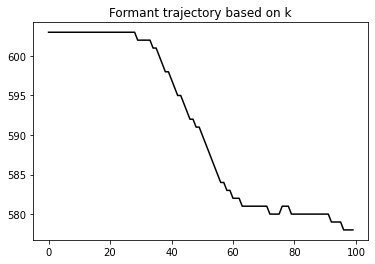

In [5]:
if 'healthy_mean_synth' in locals():
#     x_time2 = np.(0,500, num=100)
    plt.plot(healthy_mean_synth[40:140], 'b',label='Healthy Controls')
    plt.plot(cereb_mean_synth[40:140], 'orange',label='Cereb')
#     plt.fill_between(x_time2, (healthy_mean_synth[40:140]-healthy_ci_ds), (healthy_mean_synth[40:140]+healthy_ci_ds), color='blue', alpha=.1)
    
# test_theta = torch.from_numpy(np.array([0.005, 0.005, 0.01, 0.05, 0.0000001, 0.0000001, 165, 165, 0.5, 0.5, 0.5, 1.009, 1.009,1.009, 5000]))

# test_theta = torch.from_numpy(np.array([0.009, 0.05, 0.33, 1e-6, 165, 165, 500, 5, 1.01, 1.2, 100]))
# test_theta = torch.from_numpy(np.array([0.009, 0.01, 0.01, 0.01, 0.01, 8.0, 150]))
#
# test_theta = torch.from_numpy(np.array([0.0055, 0.01, 0.06, 0.06, 0.06, 1, 5, 10]))
# test_theta = torch.from_numpy(np.array([0.0055, 0.01, 1, 1]))
# for k in [0.1, 1, 1.2, 1.5, 3,5]:
# test_theta = torch.from_numpy(np.array([1e-2, 0.01, 3.9, 0.01, 0.01, 0.01]))

# test_theta = torch.from_numpy(np.array([4e-3, 1e-2, 1e-2 , 1e-4, .03, .01]))
test_theta = torch.from_numpy(np.array([4e-3, 1e-2, 1e-2 , 1e-4, 165, 165, 3.9, .01]))

# test_theta = best_HC_theta
# test_theta = best_theta
# print(test_theta)
# test_theta =  torch.from_numpy(np.append(test_theta, 10))
# print(test_theta)

simulated_test = FACTS(test_theta)
x_time = np.linspace(0,500, num=140)
# plt.plot(x_time, simulated_test)
plt.plot(simulated_test[40:], color='k')
 

plt.title(f'Formant trajectory based on k')
plt.show()


### Run an example trial, or do a parameter sweep

#### 0 Auditory noise scale:

Low: 0.0001

High: 0.04


#### 1 Somatosensory noise scale:

Low: .002

High: 1


#### 2 TSE Process Scale:

Low: 0.0001

High: 5


#### 3 TSE Covariance Scale:

Low: 0.0000001

High: 5

#### 4 ASE Process Scale:

Low: 10e-12

High: 10e-6


#### 5 ASE Covariance Scale:

Low: 10e-12

High: 10e-4


#### 6 SensoryDelay Auditory Delay:

Low: 20

High: 105

#### x7 SensoryDelay Somato Delay:

Low: 45

High: 105

#### x8 TSE estimated_auditory_delay:

Low: 10 

High: 105

#### x9 ASE estimated_somat_delay

Low: 10 

High: 30

#### 10 cc_discount


### Load Parell's data to see what it looks like

In [6]:
# import observed data
data = scipy.io.loadmat('sbi_resources/parrell_2017/parrell_data.mat')

In [7]:
print(data['parrell_data'].dtype)
print(data['parrell_data']['means'][0,0][0,0][0].shape)
print(data['parrell_data']['stds'][0,0][0,0][0].shape)

[('means', 'O'), ('stds', 'O')]
(1, 171)
(1, 171)


### Print some of these data to see what it looks like

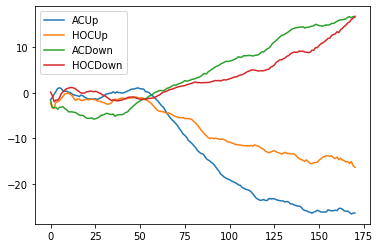

In [8]:
items = ['ACUp', 'HOCUp', 'ACDown', 'HOCDown']

for item in items:
    #pdb.set_trace()
    this_mean = data['parrell_data']['means'][0,0][item][0,0]
    if "Up" in item:
        this_mean = this_mean * -1
    plt.plot(this_mean.T, label=item)
    
plt.legend()

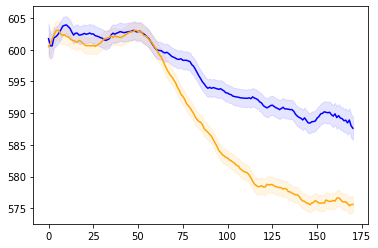

In [9]:
items = ['HOCUp', 'ACUp',]
offset = 603
# offset = 530

# for item in items:
#     #pdb.set_trace()
#     this_mean = data['parrell_data']['means'][0,0][item][0,0]
#     if "Up" in item:
#         this_mean = this_mean * -1 + offset
#     plt.plot(this_mean.T, label=item)
    
# plt.legend()

healthy_mean = data['parrell_data']['means'][0,0]['HOCUp'][0,0][0,:] *-1 +offset +1
cereb_mean = data['parrell_data']['means'][0,0]['ACUp'][0,0][0,:] *-1 +offset -1

plt.plot(healthy_mean, color='blue', label='HC')
plt.plot(cereb_mean, color='orange', label='CD')

cereb_ci = np.abs( data['parrell_data']['stds'][0,0]['ACUp'][0,0][0,:] )
healthy_ci = np.abs(data['parrell_data']['stds'][0,0]['HOCUp'][0,0][0,:] )

plt.fill_between(range(len(cereb_mean)), (cereb_mean-cereb_ci), (cereb_mean+cereb_ci), color='orange', alpha=.1)
plt.fill_between(range(len(healthy_mean)), (healthy_mean-healthy_ci), (healthy_mean+healthy_ci), color='b', alpha=.1)


## Run Simulations and/or Load data

In [10]:
# prior_min= [  1e-8,  1e-8, 1e-8, 1e-8, 0.0, 0.0]
# prior_mmax = [ 1e-3,  1e-3, 1e-3, 1e-3, 0.075, 0.075]

In [ ]:
# import facts_for_SBI

load_instead = False



# prior_min= [  0.004, 0.004, .001,  .001,  9e-7,     9e-7, 150, 150,    1e-10,  1e-10,  1e-10,      1,      1,       1,    25]
# prior_mmax = [0.006, 0.006,  2.5,  .05, 1.1e-6,   1.1e-6, 180, 180,         1,     1,      1,  1.040,  1.040,    1.040,  1e6]

# prior_min= [  0.006, 0.01,  .3,      9e-8,     150, 150,       100,         1,      1,           1,    25]
# prior_mmax = [ 0.01,  0.6,  2.5,   1.1e-5,    180, 180,      5000,          10,  1.040,      1.15,   1000]

# prior_min= [    0.0,   0.0, 1e-8,  1e-8,  9e-8,     9e-8, 150, 150,    1e-10,  1e-10,  1e-10,      1,      1,       1,    25]
# prior_mmax = [  1e-4, 1e-4,    1,    1, 1.1e-5,   1.1e-5, 180, 180,     1e10,   1e10,   1e10,      3,      3,       3,   1e6]

# test_theta = torch.from_numpy(np.array([0.009, 0.05, 0.33, 1e-6, 0, 0, 0, 0]))

# prior_min= [  0.005, 0.01,  0.01,  0.01,  0.01, .1, 1]
# prior_mmax = [ 0.01,  0.1,   1.0,   1.0,   1.0, 20, 5000]

# prior_min= [  0.005, 0.01,  0.01,  0.01,  0.01, 1,  1 ]
# prior_mmax = [ 0.01,  0.1,   1.0,   1.0,   1.0, 100, 10]

# prior_min= [  0.005, 0.01, 1,  1 ]
# prior_mmax = [ 0.01,  0.1,  100, 10]

# prior_min= [  1e-5,  1e-5,  1, 0, 0, 0]
# prior_mmax = [ 5e-2,  1e-1, 5, 1, 1, 1]

# prior_min= [  1e-5,  1e-5, 1, 1e-3,  1e-3]
# prior_mmax = [ 1e-1,  1e-1, 5, 9e-1,  9e-1]
# prior_min= [  1e-8,  1e-8, 1e-8, 1e-8]
# prior_mmax = [ 1e-3,  1e-3, 1e-3, 1e-3 ]

num_sim = 50
num_workers = 1

prior = utils.torchutils.BoxUniform(torch.as_tensor(prior_min), torch.as_tensor(prior_mmax) )
simulator2, prior = prepare_for_sbi(FACTS, prior)
inference = SNPE(prior, density_estimator='nsf')
    
# prior = torch.distributions.Uniform(torch.as_tensor(mmin), torch.as_tensor(mmax) )
for jj in range(0,250):
    print(jj)
    if load_instead == False:    
        try:
            theta, x = simulate_for_sbi(simulator2, proposal=prior, num_simulations=num_sim, num_workers=num_workers)
            #parameter_posterior = infer(simulator2, prior, method='SNPE', num_simulations=num_sim, num_workers=num_workers)
#             density_estimator = inference.append_simulations(theta, x).train()
#             posterior = inference.build_posterior(density_estimator)

        # Save the theta and x
            with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_theta_x_{num_sim}_local{jj}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
                pickle.dump([theta, x], f)
        # Save the posterior
#         with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_posterior_{num_sim}_local6.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#             pickle.dump([posterior], f)
        except Exception as e:
            print(e)
    
# else:


self.plant_scale:  0.01 
self.artic_to_task_noise_scale 0.07997593283653259


/Users/alvincepongos/opt/anaconda3/envs/FACTS_SBI_py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alvincepongos/opt/anaconda3/envs/FACTS_SBI_py37/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
Chol exception occurred
'NoneType' object has no attribute 'shape'
self.plant_scale:  0.01 
self.artic_to_task_noise_scale 0.08346150070428848
0


Running 50 simulations.:   0%|          | 0/50 [00:00<?, ?it/s]

self.plant_scale:  0.01 
self.artic_to_task_noise_scale 0.009861963801085949


/Users/alvincepongos/opt/anaconda3/envs/FACTS_SBI_py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alvincepongos/opt/anaconda3/envs/FACTS_SBI_py37/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


self.plant_scale:  0.01 
self.artic_to_task_noise_scale 0.0012426316970959306
self.plant_scale:  0.01 
self.artic_to_task_noise_scale 0.06917805224657059
self.plant_scale:  0.01 
self.artic_to_task_noise_scale 0.06331411749124527


## Load theta and x

In [ ]:
# Get list of all pickle files matching string
# all_files = os.listdir('./sbi_resources')
# path_to_files = './sbi_resources/Jan22_2025_avgeps/'
path_to_files = './sbi_resources/'
all_files = os.listdir(path_to_files) 
selected_files = [x for x in all_files if 'theta_x_' in x]
# selected_files = [x for x in all_files if 'theta_x_' in x and 'local' in x]


# Iterate through list
all_theta, all_x = torch.tensor(np.array([]), dtype=torch.float32), torch.tensor(np.array([]), dtype=torch.float32)
for file_string in selected_files:
    file = open(f'{path_to_files}{file_string}', 'rb')
#     pdb.set_trace()
    this_theta, this_x = pickle.load(file)

    # Append 
    all_theta = torch.cat((all_theta, this_theta))
    all_x = torch.cat((all_x, this_x))

    # Close file
    file.close()    
print(all_theta.shape)
print(all_x.shape)




In [ ]:
# labels = ['Aud Noise Scale', 'Somato Noise Scale', 'TSE Process Scale',
#           'TSE Covariance Scale', 'ASE Process Scale', 'ASE Covariance Scale',
#           'Auditory Delay', 'Somato Delay', 'AUKF_Qmult_for_pert', 
#           'AUKF_Rmult_for_pert', 'AUKF_Pmult_for_pert', 'AUKF_learning_rate']


# print(labels[-6])
# filter_some_data=True
# if filter_some_data == True:
#     filter_bool = all_theta[:,-6] < 180
#     all_x = all_x[filter_bool]
#     all_theta = all_theta[filter_bool]
    
# print('after too large Auditory Delay filter')
# print(all_theta.shape)
# print(all_x.shape)

# filter_data_on_magnitude=True
# if filter_data_on_magnitude == True:
#     filter_bool = torch.any(all_x < 498, dim=1)
#     all_x = all_x[~filter_bool]
#     all_theta = all_theta[~filter_bool]
    
# print('after magnitude filter')
# print(all_theta.shape)
# print(all_x.shape)

In [ ]:
filter_some_data=True
if filter_some_data == True:
    filter_bool2 = (all_x != -1).all(axis=1)
    all_x = all_x[filter_bool2]
    all_theta = all_theta[filter_bool2]
  
print('after negative filter')
print(all_theta.shape)
print(all_x.shape)

### Resample cereb data so that it resamples to 5ms to match FACTS

In [ ]:
from scipy.interpolate import interp1d
###Downsample data to match simulator output 
def downsample(array, npts):
    interpolated = interp1d(np.arange(len(array)), array, axis = 0, fill_value = 'extrapolate')
    downsampled = interpolated(np.linspace(0, len(array), npts))
    return downsampled

cereb_mean_ds = downsample(cereb_mean, 100)
healthy_mean_ds = downsample(healthy_mean, 100)

cereb_ci_ds = downsample(cereb_ci, 100)
healthy_ci_ds = downsample(healthy_ci, 100)

print(cereb_mean_ds.shape)

### Create simulated data of preonset

The first 40 frames appear to have the same unperturbed data

In [ ]:
def create_precompensation_synthetic_data(orig_data):
#     precomp_mean = np.mean(orig_data[0:40])
#     precomp_std = np.std(orig_data[0:40])
#     precomp_offset = 530
    precomp_offset = 603

    cereb_synth = np.array([precomp_offset]*40)
    return np.concatenate( (cereb_synth, orig_data) )


cereb_mean_synth = create_precompensation_synthetic_data(cereb_mean_ds)
healthy_mean_synth = create_precompensation_synthetic_data(healthy_mean_ds)
#pdb.set_trace()
x_time = np.arange(-200,500,5)
plt.plot(x_time, cereb_mean_synth )
plt.title('Cereb')
#plt.ylim([500, 535])
plt.xlim([-200,500])

plt.figure()
plt.plot(x_time, healthy_mean_synth )
plt.title('HC')
#plt.ylim([500, 535])
print(healthy_mean_synth.shape)
plt.xlim([-200,500])



### Only grab the first 140 samples to match Ben's data

100 FACTS samples covers 0-500ms

40 FACTS samples covers 200ms preperturbation, which we wont plot

In [ ]:
all_x_ds = all_x[:,0:140]
print(all_x_ds.shape)
print(all_theta.shape)
# print(all_x_ds)
# print(all_theta)

In [ ]:
# Print some of the training data, just to make sure it is diverse
sample_size = all_x_ds.shape[0]
n = sample_size
x_time = np.linspace(-200,700, num=140)
x_time_repeated = np.tile(x_time, n).reshape(n, -1)


random_samples_indices = np.random.choice(sample_size, n, replace=False)

plt.figure(figsize=(12, 8)) 
plt.plot(all_x_ds[random_samples_indices,:].T)
plt.plot(healthy_mean_synth.reshape(1,140).T, '*', label= 'HC Ben data')
plt.plot(cereb_mean_synth.reshape(1,140).T, '*', label='cereb Ben data' )
plt.plot(simulated_test, '*',label='FACTS')

plt.legend()

In [ ]:
# Show the closest training samples
differencesHC = abs(all_x_ds - healthy_mean_synth)
differencesHC_summed = torch.sum(differencesHC, dim=1)
sorted_tensorHC, indicesHC = torch.sort(differencesHC_summed)

# Sort by sum
n = 10
plt.figure(figsize=(10,8))
plt.plot(all_x_ds[indicesHC[0:n],:].T, label='Simulation data')
# plt.plot(healthy_mean_synth.reshape(1,140).T, '*', label= 'HC Ben data')
plt.plot(healthy_mean_synth.reshape(1,140).T, '*', color='Blue', label='HC Ben data' )
plt.title(f'Closest {n} training samples HC data')
lines_to_show = [0, -1]  # Index of lines to show in the legend
handles, labelss = plt.gca().get_legend_handles_labels()
selected_handles = [handles[i] for i in lines_to_show]
selected_labels = [labelss[i] for i in lines_to_show]
plt.legend(selected_handles, selected_labels)

# Plot which lines are closest
differences = abs(all_x_ds - cereb_mean_synth)
differences_summed = torch.sum(differences, dim=1)
sorted_tensor, indices = torch.sort(differences_summed)

# Sort by sum
plt.figure(figsize=(10,8))
plt.plot(all_x_ds[indices[0:n],:].T, label='Simulation data')
# plt.plot(healthy_mean_synth.reshape(1,140).T, '*', label= 'HC Ben data')
plt.plot(cereb_mean_synth.reshape(1,140).T, '*', color='orange', label='cereb Ben data' )
plt.title(f'Closest {n} training samples Cerebellar data')
lines_to_show = [0, -1]  # Index of lines to show in the legend
handles, labelss = plt.gca().get_legend_handles_labels()
selected_handles = [handles[i] for i in lines_to_show]
selected_labels = [labelss[i] for i in lines_to_show]
plt.legend(selected_handles, selected_labels)

# Sort by sum
differences_FACTS = abs(all_x_ds - simulated_test)
differencesFACTS_summed = torch.sum(differences_FACTS, dim=1)
sorted_tensorF, indicesF = torch.sort(differencesFACTS_summed)

plt.figure(figsize=(10,8))
plt.plot(all_x_ds[indicesF[0:n],:].T, label='Simulation data')
# plt.plot(healthy_mean_synth.reshape(1,140).T, '*', label= 'HC Ben data')
plt.plot(simulated_test, '*', color='green', label='FACTS' )
plt.title(f'Closest {n} training ')
lines_to_show = [0, -1]  # Index of lines to show in the legend
handles, labelss = plt.gca().get_legend_handles_labels()
selected_handles = [handles[i] for i in lines_to_show]
selected_labels = [labelss[i] for i in lines_to_show]
plt.legend(selected_handles, selected_labels)

In [ ]:
# What if we smooth the cereb_mean_synth and the healthy_mean_synth?

def smooth_np_convolve(data, window_size = 3):
    # Get a pad
    # Pad the data at the edges
    pad_width = window_size // 2
    padded_data = np.pad(data, pad_width, mode='edge')

    # Define the sliding average window size
    kernel = np.ones(window_size) / window_size

    # Apply the sliding average
    smoothed_data_interior = np.convolve(padded_data, kernel, mode='valid')

    smoothed_data = np.zeros_like(data)
    smoothed_data[0] = data[0]
    smoothed_data[-1] = data[-1]
    smoothed_data[1:-1] = smoothed_data_interior[1:-1]
    return smoothed_data

smoothed_cereb = smooth_np_convolve(cereb_mean_synth, 9)
smoothed_healthy = smooth_np_convolve(healthy_mean_synth, 9)
# plt.plot(healthy_mean_synth.reshape(1,140).T, '*', label= 'HC Ben data')
# plt.plot(cereb_mean_synth.reshape(1,140).T, '*', label='cereb Ben data' )

plt.plot(smoothed_healthy)
plt.plot(smoothed_cereb)
print(healthy_mean_synth.shape)
print(smoothed_healthy.shape)

In [ ]:
# Show the closest training samples
differencesHC = abs(all_x_ds - smoothed_healthy)
differencesHC_summed = torch.sum(differencesHC, dim=1)
sorted_tensorHC, indicesHC = torch.sort(differencesHC_summed)

# Sort by sum
n = 10
plt.figure(figsize=(10,8))
plt.plot(all_x_ds[indicesHC[0:n],:].T, label='Simulation data')
plt.plot(smoothed_healthy.reshape(1,140).T, '*', color='Blue', label='HC Ben data' )
plt.title(f'Closest {n} training samples\n Smoothed HC data')
lines_to_show = [0, -1]  # Index of lines to show in the legend
handles, labelss = plt.gca().get_legend_handles_labels()
selected_handles = [handles[i] for i in lines_to_show]
selected_labels = [labelss[i] for i in lines_to_show]
plt.legend(selected_handles, selected_labels)

plt.ylim([570, 605])
# plt.ylim([490, 540])

# Plot which lines are closest
differences = abs(all_x_ds - smoothed_cereb)
differences_summed = torch.sum(differences, dim=1)
sorted_tensor, indices = torch.sort(differences_summed)

# Sort by sum
plt.figure(figsize=(10,8))
plt.plot(all_x_ds[indices[0:n],:].T, label='Simulation data')
# plt.plot(healthy_mean_synth.reshape(1,140).T, '*', label= 'HC Ben data')
plt.plot(smoothed_cereb.reshape(1,140).T, '*', color='orange', label='cereb Ben data' )
plt.title(f'Closest {n} training samples\n Smoothed Cerebellar data')
lines_to_show = [0, -1]  # Index of lines to show in the legend
handles, labelss = plt.gca().get_legend_handles_labels()
selected_handles = [handles[i] for i in lines_to_show]
selected_labels = [labelss[i] for i in lines_to_show]
plt.legend(selected_handles, selected_labels)
plt.ylim([570, 605])
# plt.ylim([490, 540])

#plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8)) 
plt.plot(all_x_ds[random_samples_indices,:].T, label='_nolegend_', alpha=0.3)
h1 = plt.plot(smoothed_healthy.reshape(1,140).T, '*', markersize=5, label= 'HC data')
h2 = plt.plot(smoothed_cereb.reshape(1,140).T, '*', markersize=5, label='CD data' )
h3 = plt.plot(all_x_ds[0,:].T, label='Simulation data', alpha=0.1)
plt.title('Comparing simulation training data to human empirical data')
plt.xlabel('Frame')
plt.ylabel('Formant (Hz)')
plt.legend()

In [ ]:
# Plot without empiri
x_time = np.linspace(0,500, num=100)

plt.figure(figsize=(12,8))
plt.plot(x_time, healthy_mean_synth[40:140], 'blue',label='Healthy Controls')
plt.fill_between(x_time, (healthy_mean_synth[40:140]-healthy_ci_ds), (healthy_mean_synth[40:140]+healthy_ci_ds), color='blue', alpha=.1)


plt.plot(x_time, cereb_mean_synth[40:140], 'orange',label='Cerebellar Degeneration')
plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='orange', alpha=.1)

plt.xlabel('Time (ms)')
plt.ylabel('F1 Response (Hz)')

plt.legend(fontsize='medium')
plt.title('Differences in HC vs CD F1 Compensation')

In [ ]:


# Plot without empiri
x_time = np.linspace(0,500, num=100)

plt.figure(figsize=(12,8))

ft_size = 26

plt.plot(x_time, healthy_mean_synth[40:140], 'blue',label='Healthy Controls')
plt.fill_between(x_time, (healthy_mean_synth[40:140]-healthy_ci_ds), (healthy_mean_synth[40:140]+healthy_ci_ds), color='blue', alpha=.1)


# plt.plot(x_time, cereb_mean_synth[40:140], 'orange',label='Cerebellar Degeneration')
# plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='orange', alpha=.1)

plt.xlabel('Time (ms)', fontsize=ft_size,)
plt.ylabel('F1 Response (Hz)', fontsize=ft_size)

plt.legend(fontsize=ft_size)
plt.title('HC F1 Compensation', fontsize=ft_size)


font = {'family' : 'normal',
        'weight' : 'normal',
        }
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=ft_size*.8)
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.ylim([570,606])
# plt.ylim([490,540])



plt.figure(figsize=(12,8))
# plt.plot(x_time, healthy_mean_synth[40:140], 'blue',label='Healthy Controls')
# plt.fill_between(x_time, (healthy_mean_synth[40:140]-healthy_ci_ds), (healthy_mean_synth[40:140]+healthy_ci_ds), color='blue', alpha=.1)


plt.plot(x_time, cereb_mean_synth[40:140], 'orange',label='Cerebellar Degeneration')
plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='orange', alpha=.1)

plt.xlabel('Time (ms)', fontsize=ft_size,)
plt.ylabel('F1 Response (Hz)', fontsize=ft_size,)

plt.legend(fontsize=ft_size)
plt.title('CD F1 Compensation', fontsize=ft_size,)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=ft_size*.9)
plt.ylim([570,606])
# plt.ylim([490,540])

In [ ]:

# Replace_all_with_best = False
# if Replace_all_with_best:
#     print(all_x_ds.shape)
#     print(all_theta.shape)

#     print(all_x_ds[indices[0:n]].shape)
#     print(all_x_ds[indicesHC[0:n]].shape)

#     all_x_ds = torch.from_numpy( np.vstack( (all_x_ds[indices[0:n]], all_x_ds[indicesHC[0:n]]) ) )
#     all_theta = torch.from_numpy( np.vstack( (all_theta[indices[0:n]], all_theta[indicesHC[0:n]]) ))
#     print(best_x_ds.shape)
#     print(best_theta.shape)
    
    


# best_N_x = 
# best_N_theta = 

In [ ]:

# prior_min= [  0.001, 0.01,  .1,   .01,   9e-8,     9e-8, 150, 150,       100,   1e-17,      1,      1,      1,       1,    25]
# prior_mmax = [ 0.01,  0.1,  2.5,  .05, 1.1e-5,   1.1e-5, 180, 180,      5000,       5,      10,  1.040,  1.040,    1.2,   1000]

# prior_min= [  0.006, 0.01,  .3,      9e-8,     150, 150,       100,         1,      1,           1,    25]
# prior_mmax = [ 0.01,  0.6,  2.5,   1.1e-5,    180, 180,      5000,          10,  1.040,      1.15,   1000]

# prior_min= [  0.005, 0.01, 0.001,   1.1e-8,    0.01,  0.01,  0.01]
# prior_mmax = [ 0.01,  0.1,   0.1,   1.1e-5,     1.0,   1.0,   1.0]

prior = utils.torchutils.BoxUniform(torch.as_tensor(prior_min), torch.as_tensor(prior_mmax) )
simulator2, prior = prepare_for_sbi(FACTS, prior)
inference = SNPE(prior, density_estimator='nsf')

run_and_save = True
print(len(prior_min))
# Downsample all_x
if run_and_save:
#     density_estimator = inference.append_simulations(best_theta, best_x_ds).train(force_first_round_loss=True,
    density_estimator = inference.append_simulations(all_theta, all_x_ds).train(force_first_round_loss=True,
                                                                                discard_prior_samples=True, 
                                                                                show_train_summary=True,
                                                                               training_batch_size=32,
                                                                                learning_rate = 5e-5,
                                                                               ) # Look more into force_first_round_loss=True
#     density_estimator = inference.append_simulations(all_theta[0:100000,:], all_x_ds[0:100000]).train(force_first_round_loss=True)
#     posterior = inference.build_posterior(density_estimator, sample_with='mcmc')
    posterior = inference.build_posterior(density_estimator)

    # Save the posterior
    with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_posterior_{all_theta.size()[0]}_local_nsf.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump([posterior], f)
        
else:
#     with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_posterior_72000_local.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
# ModelC_auditory_soma_noise_TSE_ASE_Delay_posterior_3969_local_nsf.pkl
#     with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_posterior_3969_local_nsf.pkl', 'rb') as f:  # Python 3: open(..., 'wb')

#         pdb.set_trace()
        object_file = pickle.load(f)
        posterior = object_file[0]

In [ ]:
# # Save the posterior
# print(all_theta.size()[0])
# all_theta_size = all_theta.size()[0]
all_theta_size=3969
with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_posterior_{all_theta_size}_okay.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([posterior], f)
    
# # Save the inference
with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_inference_{all_theta_size}_okay.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([inference], f)


In [ ]:
# Helper function
def get_modes(data):
    # Initialize list to store modes
    modes = []
    
    # Iterate over each dimension (column) in the data
    for i in range(data.shape[1]):
        kde = stats.gaussian_kde(data[:, i])
        x = np.linspace(data[:, i].min(), data[:, i].max(), 1000)
        mode_x = x[np.argmax(kde.evaluate(x))]
        modes.append(mode_x)
    
    return np.array(modes)

from sklearn.neighbors import KernelDensity
from scipy.optimize import minimize

def find_multivariate_mode(data_tensor, bandwidth=0.1, kernel='gaussian'):
    # Convert PyTorch tensor to NumPy array for compatibility with KDE
    data_np = data_tensor.numpy()
    
    # Fit the KDE model to the data
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)  # Adjust bandwidth if needed
    kde.fit(data_np)

    # Define the PDF function to evaluate the density at any given point
    def pdf(x):
        log_density = kde.score_samples(x.reshape(1, -1))  # Log density for a single point
        return np.exp(log_density)  # Convert log density to regular density

    # Define the negative PDF function for minimization (since we want to maximize PDF)
    def neg_pdf(x):
        return -pdf(x)

    # Use the mean of the data as the initial guess for optimization
    initial_guess = np.mean(data_np, axis=0)

    # Minimize the negative PDF to find the mode
    result = minimize(neg_pdf, initial_guess, method='L-BFGS-B')
    mode = result.x  # This is the mode in NumPy array format

    # Convert mode back to PyTorch tensor
    mode_tensor = torch.tensor(mode, dtype=data_tensor.dtype)
    
    return mode_tensor

In [ ]:
# labels = ['Aud Noise Scale', 'Somato Noise Scale', 'TSE Process Scale',
#           'TSE Covariance Scale', 'ASE Process Scale', 'ASE Covariance Scale',
#           'Auditory Delay', 'Somato Delay', 'cc_discount_from_delay_TSE','cc_discount_from_delay_ASE', 
#           'cc_decay', 'cc_minimum']
# labels = ['Aud Noise Scale', 'Somato Noise Scale', 'TSE Process Scale',
#           'TSE Covariance Scale', 'ASE Process Scale', 'ASE Covariance Scale',
#           'Auditory Delay', 'Somato Delay', 
#           'AUKF_Rmult_for_pert', 
#           'AUKF_Qmult_for_pert', 
#           'AUKF_Pmult_for_pert', 
#           'AUKF_learning_rate_R',
#          'AUKF_learning_rate_Q',
#          'AUKF_learning_rate_P',
#          'sensory_error_threshold']

## Sample the posterior for the mean of all trials

In [ ]:
sample_size = 10000
# sample_size = all_theta.size()[0]

In [ ]:
# samples_test_FACTS = posterior.sample((sample_size,), x=simulated_test)
# # samples_test_FACTS = posterior.sample((702438,), x=simulated_test)

In [ ]:
# samples_cereb = posterior.sample((all_theta.size()[0],), x=cereb_mean_synth)
samples_cereb = posterior.sample((sample_size,), x=cereb_mean_synth)
# samples_cereb = posterior.sample((sample_size,), x=smoothed_cereb)

In [ ]:
# samples_healthy = posterior.sample((all_theta.size()[0],), x=healthy_mean_synth)
samples_healthy = posterior.sample((sample_size,), x=healthy_mean_synth)
# samples_healthy = posterior.sample((sample_size,), x=smoothed_healthy)

In [ ]:
# plt.rcParams.update({'font.size': 12})

# #Append test_FACTS
# px_testFACTS = pd.DataFrame(samples_test_FACTS).astype("float")
# display(px_testFACTS)
# px_testFACTS.set_axis(labels, axis="columns", inplace=True)
# px_testFACTS["Group"] = "TestFACTS"

# px2 = px_testFACTS
# g = sns.PairGrid(px2, diag_sharey=False, corner=True)

# g = sns.pairplot(px, corner=True, kind='hist')
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot)
# g.add_legend()

In [ ]:
# px_healthy.shape
# len(labels)
# # print(labels)
# labels = ['Aud Noise Scale', 
#           'Somato Noise Scale', 
#           'ArticToTask Scale',
#           'TaskSFCLaw Noise Scale',
#           'ArticSFCLaw Noise Scale',
#           'AUKF_PMult'
# #           'TSE Covariance Scale',
# #           'ASE Covariance Scale',
          
# ]

In [ ]:
# labels = ['Aud Noise Scale', 
#           'Somato Noise Scale', 
#           'TSE Process Scale',
#           'ASE Process Scale',
#           'ArticToTask Scale',
#           'TaskSFCLaw Noise Scale',
#           'ArticSFCLaw Noise Scale',
#           'TSE Covariance Scale',
#           'ASE Covariance Scale']

# Append Healthy data
px_healthy = pd.DataFrame(samples_healthy).astype("float")
px_healthy.set_axis(labels, axis="columns", inplace=True)
px_healthy["Group"] = "HC"

# Append CD
px = pd.DataFrame(samples_cereb).astype("float")
px.set_axis(labels, axis="columns", inplace=True)
px["Group"] = "CD"

#Append test_FACTS
# px_testFACTS = pd.DataFrame(samples_test_FACTS[1::2]).astype("float")
# px_testFACTS.set_axis(labels, axis="columns", inplace=True)
# px_testFACTS["Group"] = "TestFACTS"

# px2 = px_testFACTS
px2 = pd.concat([px,px_healthy], ignore_index=True)

g = sns.PairGrid(px2, diag_sharey=False, corner=True, hue="Group", hue_order=['HC','CD'])

# g = sns.pairplot(px, corner=True, kind='hist')
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.add_legend()

### Plot estimated formant to observed formant

In [ ]:
# from scipy import stats

# plt.rcParams.update({'font.size': 22})

# torch.set_printoptions(sci_mode=True)

# posterior_modes_FACTS = stats.mode(samples_test_FACTS,0)
# posterior_modes_FACTS = torch.from_numpy(posterior_modes_FACTS[0][0])
# print(f'poster modes {posterior_modes_FACTS}')
# # print(f'original theta {original_theta}')
# # pdb.set_trace()

# all_simulated_formant_facts = np.array([])
# for ii in range(2):
#     all_simulated_formant_facts = FACTS(posterior_modes_FACTS)
#     if ii == 0:
#         all_simulated_formant = all_simulated_formant_facts
#     else:
#         all_simulated_formant = np.vstack((all_simulated_formant, all_simulated_formant_facts))
        
# #pdb.set_trace()
# # simulated_formant = FACTS(posterior_modes_FACTS)
# mean_formants = np.mean(all_simulated_formant, axis=0)
# ci = np.std(all_simulated_formant, axis=0)

# x_time = np.linspace(-200,700, num=140)

# plt.figure(figsize=(14,10))
# # Plot "Estimations"
# plt.plot(x_time, mean_formants, label='estimated from posteriors')
# plt.fill_between(x_time, (mean_formants-ci), (mean_formants+ci), color='b', alpha=.1)

# # Plot Empirical Data
# plt.plot(x_time, simulated_test, 'k',label='FACTS output')
# # plt.fill_between(x_time, (simulated_test-healthy_ci), (simulated_test+healthy_ci), color='k', alpha=.1)

# #  plt.axvline(x = 0, color = 'grey', ls=':')
# plt.legend()

# plt.xlabel('Time (ms)')
# plt.ylabel('Formant response (Hz)')
# plt.title('FACTS Empirical')

In [ ]:
torch.set_printoptions(sci_mode=False)
torch.set_printoptions(precision=30)

print(labels)
# posterior_modes_HC = stats.mode(samples_healthy,0)
# posterior_modes_HC = torch.from_numpy(posterior_modes_HC[0][0])

# posterior_modes_HC = get_modes(samples_healthy)
# posterior_modes_HC = np.average(samples_healthy, axis=0)
# posterior_modes_HC = np.median(samples_healthy, axis=0)
# posterior_modes_HC = torch.from_numpy(posterior_modes_HC)
# print(f'poster modes {posterior_modes_HC}')
# print(f'original theta {0.005, 0.005, 0.01, 0.1, 0.0000001, 0.0000001, 100, 50, 3}')
# pdb.set_trace()


# posterior_modes_HC_manual_test = posterior_modes_HC.detach().clone()
# posterior_modes_HC_manual_test[-2] = 0.98
# posterior_modes_HC_manual_test[2] = 0.04
# posterior_modes_HC_manual_test[5] = posterior_modes_HC[5] * 100

# posterior_modes_HC_manual_test = torch.tensor([0.0005,
#             0.0005,
#             0.1,
#             0.000001, 
#             0.000001, 
#             0.000001,
#             150.0,
#             100.0,
#             100.0,
#             75.0,
#             0.958,
#             6.0]) 

# posterior_modes_HC2 = posterior_modes_HC.clone()
# posterior_modes_HC2[2] = posterior_modes_HC_manual_test[2]

posterior_modes_HC = find_multivariate_mode(samples_healthy, bandwidth=1)

best_theta_hc = all_theta[indicesHC[0],:]
print(best_theta_hc)

HC_simulations = []
for ii in range(15):
    simulated_formant_H = FACTS(posterior_modes_HC)
#     print(f'posterior_modes_HC_manual_test {posterior_modes_HC_manual_test}')
    simulated_formant_manual_test = FACTS(best_theta_hc)
    HC_simulations.append(simulated_formant_H)
#     pdb.set_trace() 
    # Plot data
    x_time = np.linspace(0,500, num=100)
    plt.figure(figsize=(14,10))
    plt.plot(x_time, simulated_formant_H[40:140], label='estimated from posteriors')

    plt.plot(x_time, healthy_mean_synth[40:140], 'k',label='Mean of observed trials')
    plt.fill_between(x_time, (healthy_mean_synth[40:140]-healthy_ci_ds), (healthy_mean_synth[40:140]+healthy_ci_ds), color='k', alpha=.1)
    plt.plot(x_time, all_x_ds[indicesHC[0:1],40:].T, color='red', label='Closest training data')

    plt.plot(x_time, simulated_formant_manual_test[40:140], 'purple',label='Best theta')
#         plt.axvline(x = 0, color = 'grey', ls=':')
    plt.legend()

    plt.xlabel('Time (ms)')
    plt.ylabel('Formant response (Hz)')
    plt.title('Healthy Empirical')

# print(f'difference of parameter values = {posterior_modes_HC - posterior_modes_HC_manual_test}')


In [ ]:
HC_simulations_np = np.array(HC_simulations)
HC_simulations_np = np.stack(HC_simulations_np)
HC_simulations_np.shape

mean_HC_simulations = np.mean(HC_simulations_np[:,40:140], axis=0)
Sem_HC_simulations = np.std(HC_simulations_np[:,40:140], axis=0) / np.sqrt(HC_simulations_np.shape[0])


plt.figure(figsize=(14,10))
plt.plot(x_time, healthy_mean_synth[40:140], 'k',label='Mean of observed trials')
plt.fill_between(x_time, (healthy_mean_synth[40:140]-healthy_ci_ds), (healthy_mean_synth[40:140]+healthy_ci_ds), color='k', alpha=.1)
plt.plot(x_time, all_x_ds[indicesHC[0:1],40:].T, color='red', label='Closest training data')

plt.plot(x_time, mean_HC_simulations, label='Mean estimated from posteriors')
plt.fill_between(x_time, (mean_HC_simulations-Sem_HC_simulations), (mean_HC_simulations+Sem_HC_simulations), color='blue', alpha=.1)


plt.legend()

plt.xlabel('Time (ms)')
plt.ylabel('Formant response (Hz)')
plt.title('Healthy Empirical')

In [ ]:
np.set_printoptions(precision=4)
pd.set_option('display.float_format', '{:.7f}'.format)
np.set_printoptions(suppress=True)

best_HC_theta = all_theta[indicesHC[0],:]
print(best_HC_theta)
this_df_HC = pd.DataFrame({'Parameter label': labels,
#                         'posterior_modes_CD_manual_test': posterior_modes_HC_manual_test.numpy().tolist(),
                        'best_training_data':best_HC_theta.numpy().tolist(),
                       'posterior_modes_C': posterior_modes_HC.numpy().tolist(),
                       'difference in parameter tensors': (posterior_modes_HC - best_HC_theta).numpy().tolist(),
                       'Percent diff': ((posterior_modes_HC - best_HC_theta)/best_HC_theta*100).numpy().tolist()
                       })

display(this_df_HC)


In [ ]:
print(labels)
# posterior_modes_C = stats.mode(samples_cereb,0)
# posterior_modes_C = torch.from_numpy(posterior_modes_C[0][0])

posterior_modes_C = get_modes(samples_cereb)
# posterior_modes_C = np.median(samples_cereb, axis=0)
# posterior_modes_C = np.average(samples_cereb, axis=0)
posterior_modes_C = torch.from_numpy(posterior_modes_C)

# print(f'poster modes {posterior_modes_C}')
# print(posterior_modes.shape)
# pdb.set_trace()


# samples_cereb_multi = posterior.sample((sample_size,), x=smoothed_cereb)
# samples_cereb_2 = posterior.sample((1000,), x=cereb_mean_synth)
# samples_cereb_multi = posterior_CD_SNPE_loaded.sample((500,), x=cereb_mean_synth)
# posterior_modes_C = find_multivariate_mode(samples_cereb, bandwidth=1)#, kernel='epanechnikov')
print(posterior_modes_C)

#posterior_modes_C_manual_test = posterior_modes_C.detach().clone()
posterior_modes_CD_manual_test = torch.tensor([0.005,
            0.0005,
            4.0,
            0.0000001, 
            0.0001, 
            0.000001,
            150.0,
            100.0,
            100.8,
            55.0,
            0.955,
            6.0])


# print(f'posterior_modes_C_manual_test {posterior_modes_C_manual_test}')
# posterior_modes_C2 = posterior_modes_C.clone()
# posterior_modes_C2[3] = posterior_modes_CD_manual_test[3]

best_theta = all_theta[indices[0:1],:]
# Sort by sum
CD_simulations = []
for ii in range(15):
    #pdb.set_trace()
    simulated_formant_C = FACTS(posterior_modes_C)
    CD_simulations.append(simulated_formant_C)
#     simulated_formant_manual_test = FACTS(best_theta)
    
    x_time = np.linspace(0,500, num=100)

    plt.figure(figsize=(14,10))
    plt.plot(x_time, simulated_formant_C[40:140], 'orange', label='estimated from posteriors')
    plt.plot(x_time, cereb_mean_synth[40:140], 'k',label='Mean of observed trials')
#     plt.plot(x_time, all_simulated_formant_facts
    plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='k', alpha=.1)
#     plt.plot(x_time, simulated_formant_manual_test[40:140], 'red',label='best theta tuning')
#     plt.plot(x_time, simulated_formant_manual_test2[40:140], 'magenta',label='Manual test')
    plt.plot(x_time, all_x_ds[indices[0:1],40:].T, label='Closest training data', color='red')
#     plt.axvline(x = 0, color = 'grey', ls=':')
    plt.legend()

    plt.xlabel('Time (ms)')
    plt.ylabel('Formant response (Hz)')
    plt.title('CD Empirical')
    
# print(f'% difference in parameter tensors {(posterior_modes_C - posterior_modes_CD_manual_test)/posterior_modes_CD_manual_test}')
print(f'% difference in parameter tensors {(posterior_modes_C - best_theta)/best_theta*100}')



In [ ]:
CD_simulations_np = np.array(CD_simulations)
CD_simulations_np = np.stack(CD_simulations_np)
CD_simulations_np.shape

mean_CD_simulations = np.mean(CD_simulations_np[:,40:140], axis=0)
Sem_CD_simulations = np.std(CD_simulations_np[:,40:140], axis=0) / np.sqrt(HC_simulations_np.shape[0])


plt.figure(figsize=(14,10))
plt.plot(x_time, cereb_mean_synth[40:140], 'k',label='Mean of observed trials')
plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='k', alpha=.1)

plt.plot(x_time, mean_CD_simulations, label='Mean estimated from posteriors', color='orange')
plt.fill_between(x_time, (mean_CD_simulations-Sem_CD_simulations), (mean_CD_simulations+Sem_CD_simulations), color='orange', alpha=.1)


plt.legend()

plt.xlabel('Time (ms)')
plt.ylabel('Formant response (Hz)')
plt.title('CD Empirical')

In [ ]:
np.set_printoptions(precision=4)
pd.set_option('display.float_format', '{:.7f}'.format)

# posterior_modes_C - best_theta)/best_theta
print(best_theta[0].tolist())
print((posterior_modes_C - best_theta[0]).numpy().tolist())
this_df = pd.DataFrame({'Parameter label': labels,
                        'best training data': best_theta[0].tolist(),
                       'posterior_modes_C': posterior_modes_C.numpy().tolist(),
                       'difference in parameter tensors': (posterior_modes_C - best_theta[0]).numpy().tolist(),
                       'Percent diff': ((posterior_modes_C - best_theta[0])/best_theta[0]*100).numpy().tolist()
                       })

display(this_df)

In [ ]:
x_time = np.linspace(0,500, num=100)

plt.figure(figsize=(12,8))
plt.plot(x_time, healthy_mean_synth[40:140], 'blue',label='Empirical data: Healthy Controls')
# plt.plot(x_time, simulated_formant_H[40:140], 'blue', linestyle='--' ,label='Estimated from posteriors')
plt.plot(x_time, mean_HC_simulations, 'blue', linestyle='--' ,label='Estimated from posteriors')
plt.fill_between(x_time, (healthy_mean_synth[40:140]-healthy_ci_ds), (healthy_mean_synth[40:140]+healthy_ci_ds), color='blue', alpha=.1)


plt.plot(x_time, cereb_mean_synth[40:140], 'orange',label='Empricial Data: Cerebellar')
# plt.plot(x_time, simulated_formant_C[40:140], 'orange', linestyle='--' ,label='Estimated from posteriors')
plt.plot(x_time, mean_CD_simulations, 'orange', linestyle='--' ,label='Estimated from posteriors')
plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='orange', alpha=.1)

plt.xlabel('Time (ms)')
plt.ylabel('F1 Response (Hz)')

plt.legend(fontsize='medium')
plt.title('Simulation Based Inference Posteriors Describe\n Differences in HC vs CD Behavior')



# Plot smoothed
# smoothed_cereb = smooth_np_convolve(cereb_mean_synth, 9)
# smoothed_healthy = smooth_np_convolve(healthy_mean_synth, 9)
plt.figure(figsize=(12,8))
plt.plot(x_time, smoothed_healthy[40:140], 'blue',label='Empirical data: Healthy Controls')
# plt.plot(x_time, simulated_formant_H[40:140], 'blue', linestyle='--' ,label='Estimated from posteriors')
plt.plot(x_time, mean_HC_simulations, 'blue', linestyle='--' ,label='Estimated from posteriors')
plt.fill_between(x_time, (smoothed_healthy[40:140]-healthy_ci_ds), (smoothed_healthy[40:140]+healthy_ci_ds), color='blue', alpha=.1)


plt.plot(x_time, smoothed_cereb[40:140], 'orange',label='Empricial Data: Cerebellar')
# plt.plot(x_time, simulated_formant_C[40:140], 'orange', linestyle='--' ,label='Estimated from posteriors')
plt.plot(x_time, mean_CD_simulations, 'orange', linestyle='--' ,label='Estimated from posteriors')
plt.fill_between(x_time, (smoothed_cereb[40:140]-cereb_ci_ds), (smoothed_cereb[40:140]+cereb_ci_ds), color='orange', alpha=.1)

plt.xlabel('Time (ms)')
plt.ylabel('F1 Response (Hz)')

plt.legend(fontsize='medium')
plt.title('Simulation Based Inference Posteriors Describe\n Differences in HC vs CD Behavior')

# Ablation Study
Iterate through each of the parameters i.
 
1.  Grab the mode of the CD posteriors
2.  Replace the CD parameter value at index i with an HC parameter value at index i
3.  Store the RMSE of each iteration


In [ ]:
from sklearn.metrics import mean_squared_error
# print(posterior_modes_HC)
# print(simulated_formant_H)

# print(posterior_modes_C.shape)
# print(simulated_formant_C)

# posterior_modes_C_np = posterior_modes_C.detach().cpu().numpy()
# posterior_modes_HC_np = posterior_modes_HC.detach().cpu().numpy()

# Store original rmse
original_rmse = np.sqrt(mean_squared_error(simulated_formant_H, simulated_formant_C))

# Initialize lists to store RMSE means and SEMs for ablated parameters
ablated_rmse_means_HC = []
ablated_rmse_means_CD = []

ablated_rmse_sems_HC = []
ablated_rmse_sems_CD = []

# Perform ablation study
num_runs = 3
for i in range(len(posterior_modes_C)):
    print(f'################################################################################### {i} ###################################################################################')
    rmse_values_HC = []
    rmse_values_CD = []
    for _ in range(num_runs):
        # Create an ablated CD tensor
        ablated_CD = posterior_modes_C.clone()
        ablated_CD[i] = posterior_modes_HC[i]
        
        # Run the ablated CD tensor through the simulation function
        ablated_CD_simulation = FACTS(ablated_CD)
        HC_simulation = FACTS(posterior_modes_HC)
        
        # Calculate RMSE for the ablated CD tensor
        rmse_HC = np.sqrt(mean_squared_error(HC_simulation[40:140], healthy_mean_synth[40:140]))
        rmse_CD = np.sqrt(mean_squared_error(ablated_CD_simulation[40:140], cereb_mean_synth[40:140]))
        rmse_values_HC.append(rmse_HC)
        rmse_values_CD.append(rmse_CD)
    
    # Calculate mean and SEM for the RMSE values
    mean_rmse_HC = np.mean(rmse_values_HC)
    mean_rmse_CD = np.mean(rmse_values_CD)
    
    sem_rmse_HC = np.std(rmse_values_HC) / np.sqrt(num_runs)
    sem_rmse_CD = np.std(rmse_values_CD) / np.sqrt(num_runs)
    
    ablated_rmse_means_HC.append(mean_rmse_HC)
    ablated_rmse_means_CD.append(mean_rmse_CD)
    
    ablated_rmse_sems_HC.append(sem_rmse_HC)
    ablated_rmse_sems_CD.append(sem_rmse_CD)
    

# # Plot the RMSE of each ablated parameter with error bars
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(CD)), ablated_rmse_means, yerr=ablated_rmse_sems, capsize=5, tick_label=[f'Param {i+1}' for i in range(len(CD))])
# plt.axhline(y=original_rmse, color='r', linestyle='--', label='Original CD RMSE')
# plt.xlabel('Ablated Parameter Index')
# plt.ylabel('RMSE')
# plt.title('Mean RMSE with SEM for Each Ablated Parameter (CD vs HC)')
# plt.legend()
# plt.show()

In [ ]:
# Example parameter labels (replace with your actual parameter names or indices)
parameter_labels = [f'{label}' for i, label in enumerate(labels)]

# X-axis positions for grouped bars
x = np.arange(len(parameter_labels))

# Bar width for grouped bars
bar_width = 0.4

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, ablated_rmse_means_HC, bar_width, yerr=ablated_rmse_sems_HC, capsize=5, label='HC', alpha=0.8)
plt.bar(x + bar_width / 2, ablated_rmse_means_CD, bar_width, yerr=ablated_rmse_sems_CD, capsize=5, label='CD', alpha=0.8)

# Customize the plot
plt.xticks(x, parameter_labels, rotation=90, ha='right')
# plt.axhline(y=original_rmse, color='r', linestyle='--', label='Original RMSE (CD)')
plt.xlabel('Parameters')
plt.ylabel('RMSE')
plt.title('Ablation Study: HC vs CD RMSE')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})

# Sort data in descending order of CD RMSE
sorted_indices = np.argsort(ablated_rmse_means_CD)[::-1]
ablated_rmse_means_HC_sorted = np.array(ablated_rmse_means_HC)[sorted_indices]
ablated_rmse_means_CD_sorted = np.array(ablated_rmse_means_CD)[sorted_indices]
ablated_rmse_sems_HC_sorted = np.array(ablated_rmse_sems_HC)[sorted_indices]
ablated_rmse_sems_CD_sorted = np.array(ablated_rmse_sems_CD)[sorted_indices]
parameter_labels_sorted = [parameter_labels[i] for i in sorted_indices]

# X-axis positions for grouped bars
x = np.arange(len(parameter_labels_sorted))

# Bar width for grouped bars
bar_width = 0.4

# Create the grouped bar plot
plt.figure(figsize=(12, 8))  # Increased height from 6 to 8
plt.bar(x - bar_width / 2, ablated_rmse_means_HC_sorted, bar_width, yerr=ablated_rmse_sems_HC_sorted, capsize=5, label='HC', alpha=0.8)
plt.bar(x + bar_width / 2, ablated_rmse_means_CD_sorted, bar_width, yerr=ablated_rmse_sems_CD_sorted, capsize=5, label='CD', alpha=0.8)

# Customize the plot
plt.xticks(x, parameter_labels_sorted, rotation=90, ha='right')
# plt.axhline(y=original_rmse, color='r', linestyle='--', label='Original RMSE (CD)')
plt.xlabel('Parameters')
plt.ylabel('RMSE')
plt.title('Ablation Study: HC vs CD RMSE (Sorted by CD RMSE)')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Marginal Sensitivity Analysis

15 parameters x 5 stds x 3 runs x 8 seconds each run = 1800 seconds or 30 minutes

In [ ]:
# Initialize results storage
sensitivity_rmse_means_HC = []
sensitivity_rmse_means_CD = []
sensitivity_rmse_sems_HC = []
sensitivity_rmse_sems_CD = []
simulation_outputs_HC = {}
simulation_outputs_CD = {}

In [ ]:
# Define perturbation levels
# perturbations = [-3, -1.5, 0, 1.5, 3] #[0, 1, -1, 2, -2]
perturbations = [-3, -1.5, 0, 1.5, 3]


print(samples_healthy.shape)
std_devs_HC = samples_healthy.std(dim=0, unbiased=True) #np.std(samples_healthy, axis=0)
std_devs_C = samples_cereb.std(dim=0, unbiased=True) #np.std(samples_cereb, axis=0)

# Marginal sensitivity analysis
num_runs = 3
for i, (hc_mode, cd_mode, hc_std, cd_std) in enumerate(zip(posterior_modes_HC, posterior_modes_C, std_devs_HC, std_devs_C)): # 15 params
    print(f'################################################################################### {i} ###################################################################################')
    rmse_values_HC = []
    rmse_values_CD = []
    
    sem_values_HC = []
    sem_values_CD = []
    
    simulation_outputs_HC[i] = []
    simulation_outputs_CD[i] = []

    for p in perturbations: # 5
        perturbed_HC = posterior_modes_HC.clone()
        perturbed_CD = posterior_modes_C.clone()
        
        # Apply perturbations
        perturbed_HC[i] += p * hc_std
        perturbed_CD[i] += p * cd_std

        hc_simulation_runs = []
        cd_simulation_runs = []
        rmse_runs_HC = []
        rmse_runs_CD = []

        for _ in range(num_runs): # 3 runs
            # Run simulations
            hc_sim = FACTS(perturbed_HC)
            cd_sim = FACTS(perturbed_CD)

            # Store simulations for later plotting
            hc_simulation_runs.append(hc_sim)
            cd_simulation_runs.append(cd_sim)

            # Calculate RMSE
#             if p==0:
#                 pdb.set_trace()
            rmse_runs_HC.append(np.sqrt(mean_squared_error(hc_sim[40:140], healthy_mean_synth[40:140])))
            rmse_runs_CD.append(np.sqrt(mean_squared_error(cd_sim[40:140], cereb_mean_synth[40:140])))
        
#             sem_runs_HC.append(np.std(rmse_runs_HC, axis=0) / np.sqrt(num_runs))
#             sem_runs_CD.append(np.std(rmse_runs_CD, axis=0) / np.sqrt(num_runs))

        # Store mean simulations
#         pdb.set_trace()
        simulation_outputs_HC[i].append(torch.stack(hc_simulation_runs).mean(dim=0))
        simulation_outputs_CD[i].append(torch.stack(cd_simulation_runs).mean(dim=0))

        # Store RMSE mean and SEM
        rmse_values_HC.append(np.mean(rmse_runs_HC))
        rmse_values_CD.append(np.mean(rmse_runs_CD))
        
        sem_values_HC.append(np.std(rmse_runs_HC, axis=0) / np.sqrt(num_runs))
        sem_values_CD.append(np.std(rmse_runs_CD, axis=0) / np.sqrt(num_runs))
#         sem_values_HC.append(np.mean(sem_runs_HC))
#         sem_values_CD.append(np.mean(sem_runs_CD))
    
    # Aggregate results
    sensitivity_rmse_means_HC.append(rmse_values_HC)
    sensitivity_rmse_means_CD.append(rmse_values_CD)
    sensitivity_rmse_sems_HC.append(sem_values_HC)
    sensitivity_rmse_sems_CD.append(sem_values_CD)

In [ ]:
print(sensitivity_rmse_means_HC[0])
print(sensitivity_rmse_sems_CD[0])


In [ ]:
num_of_params = 4 #len(labels)
# Example parameter labels (replace with actual labels)
parameter_labels = [f'{label}' for i, label in enumerate(labels)]

# Perturbation levels for x-axis
# perturbations = [-2,-1,0,1,2] #[0, 1, -1, 2, -2]

# sorted_indices = np.argsort(perturbations)
# sorted_perturbations = [perturbations[i] for i in sorted_indices]

# Create subplots with 3 rows and len(parameter_labels) columns
# num_params = len(parameter_labels)
fig, axes = plt.subplots(3, num_of_params, figsize=(25, 15), constrained_layout=True, sharey=False)

for i, param_label in enumerate(parameter_labels[:num_of_params]):
    # Row 1: RMSE vs Perturbation for HC and CD
#     axes[0, i].errorbar(perturbations, sensitivity_rmse_means_HC[i], 
#                         yerr=sensitivity_rmse_sems_HC[i], label='HC', fmt='-o')
#     axes[0, i].errorbar(perturbations, sensitivity_rmse_means_CD[i], 
#                         yerr=sensitivity_rmse_sems_CD[i], label='CD', fmt='-o')
#     axes[0, i].set_title(f'{param_label}')
#     axes[0, i].set_xlabel('Perturbation (std)')
#     axes[0, i].set_ylabel('RMSE')
#     axes[0, i].legend()
#     axes[0, i].grid(True)

#     sorted_rmse_means_HC = [sensitivity_rmse_means_HC[i][j] for j in sorted_indices]
#     sorted_rmse_means_CD = [sensitivity_rmse_means_CD[i][j] for j in sorted_indices]
#     sorted_sems_HC = [sensitivity_rmse_sems_HC[j] for j in sorted_indices]
#     sorted_sems_CD = [sensitivity_rmse_sems_CD[j] for j in sorted_indices]
    
#     x = np.arange(len(sorted_perturbations))
#     bar_width = 0.35
#     axes[0, i].bar(x - bar_width / 2, sorted_rmse_means_HC, bar_width,
# #                    yerr=sorted_sems_HC, 
#                    capsize=5, label='HC', alpha=0.8)
#     axes[0, i].bar(x + bar_width / 2, sorted_rmse_means_CD, bar_width,
# #                    yerr=sorted_sems_CD, 
#                    capsize=5, label='CD', alpha=0.8)
#     axes[0, i].set_title(param_label)
#     axes[0, i].set_xlabel('Perturbation (std)')
#     axes[0, i].set_ylabel('RMSE')
#     axes[0, i].set_xticks(x)
#     axes[0, i].set_xticklabels(sorted_perturbations)
#     axes[0, i].legend()
#     axes[0, i].grid(True)

#      # Plot HC and CD bars side by side
    x = np.arange(len(perturbations))
    axes[0, i].bar(x - bar_width / 2, sensitivity_rmse_means_HC[i], bar_width,
                yerr=sensitivity_rmse_sems_HC[i], capsize=5, label='HC', alpha=0.8)
    axes[0, i].bar(x + bar_width / 2, sensitivity_rmse_means_CD[i], bar_width,
                yerr=sensitivity_rmse_sems_CD[i], capsize=5, label='CD', alpha=0.8)

    # Customize the plot
    axes[0, i].set_title(param_label)
    axes[0, i].set_xlabel('Perturbation (std)')
    axes[0, i].set_xticks(x)
    axes[0, i].set_xticklabels(perturbations)
    axes[0, i].grid(True)

    # Row 2: Simulation Outputs for HC Perturbations
    for j, perturbation in enumerate(perturbations):
        axes[1, i].plot(simulation_outputs_HC[i][j][40:140], label=f'{perturbation} std')
    axes[1, i].plot(healthy_mean_synth[40:140], label=f'HC Ground Truth', color='k')
    axes[1, i].set_xlabel('Frame')
    axes[1, i].set_ylabel('Simulation Output')
    axes[1, i].set_title(f'HC Simulation Outputs')
    axes[1, i].legend()
    axes[1, i].grid(True)
    axes[1, i].set_ylim([568,605])

    # Row 3: Simulation Outputs for CD Perturbations
    for j, perturbation in enumerate(perturbations):
        axes[2, i].plot(simulation_outputs_CD[i][j][40:140], label=f'{perturbation} std')
    axes[2, i].plot(cereb_mean_synth[40:140], label=f'CD Ground Truth', color='k')
    axes[2, i].set_xlabel('Frame')
    axes[2, i].set_ylabel('Simulation Output')
    axes[2, i].set_title(f'CD Simulation Outputs')
    axes[2, i].legend()
    axes[2, i].grid(True)
    axes[2, i].set_ylim([568,605])

# Set overall plot title and adjust layout
# plt.suptitle('Sensitivity Analysis: RMSE and Simulation Outputs', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# num_params = len(parameter_labels)
offset = 4
fig, axes = plt.subplots(3, num_of_params, figsize=(25, 15), constrained_layout=True, sharey=False)

for i, param_label in enumerate(parameter_labels[offset:offset+num_of_params]):
    ii=i+offset
    # Row 1: RMSE vs Perturbation for HC and CD
#     axes[0, i].errorbar(perturbations, sensitivity_rmse_means_HC[i], 
#                         yerr=sensitivity_rmse_sems_HC[i], label='HC', fmt='-o')
#     axes[0, i].errorbar(perturbations, sensitivity_rmse_means_CD[i], 
#                         yerr=sensitivity_rmse_sems_CD[i], label='CD', fmt='-o')
#     axes[0, i].set_title(f'{param_label}')
#     axes[0, i].set_xlabel('Perturbation (std)')
#     axes[0, i].set_ylabel('RMSE')
#     axes[0, i].legend()
#     axes[0, i].grid(True)

#     sorted_rmse_means_HC = [sensitivity_rmse_means_HC[i][j] for j in sorted_indices]
#     sorted_rmse_means_CD = [sensitivity_rmse_means_CD[i][j] for j in sorted_indices]
#     sorted_sems_HC = [sensitivity_rmse_sems_HC[j] for j in sorted_indices]
#     sorted_sems_CD = [sensitivity_rmse_sems_CD[j] for j in sorted_indices]
    
#     x = np.arange(len(sorted_perturbations))
#     bar_width = 0.35
#     axes[0, i].bar(x - bar_width / 2, sorted_rmse_means_HC, bar_width,
# #                    yerr=sorted_sems_HC, 
#                    capsize=5, label='HC', alpha=0.8)
#     axes[0, i].bar(x + bar_width / 2, sorted_rmse_means_CD, bar_width,
# #                    yerr=sorted_sems_CD, 
#                    capsize=5, label='CD', alpha=0.8)
#     axes[0, i].set_title(param_label)
#     axes[0, i].set_xlabel('Perturbation (std)')
#     axes[0, i].set_ylabel('RMSE')
#     axes[0, i].set_xticks(x)
#     axes[0, i].set_xticklabels(sorted_perturbations)
#     axes[0, i].legend()
#     axes[0, i].grid(True)

#      # Plot HC and CD bars side by side
    x = np.arange(len(perturbations))
    axes[0, i].bar(x - bar_width / 2, sensitivity_rmse_means_HC[ii], bar_width,
                yerr=sensitivity_rmse_sems_HC[ii], capsize=5, label='HC', alpha=0.8)
    axes[0, i].bar(x + bar_width / 2, sensitivity_rmse_means_CD[ii], bar_width,
                yerr=sensitivity_rmse_sems_CD[ii], capsize=5, label='CD', alpha=0.8)

    # Customize the plot
    axes[0, i].set_title(param_label)
    axes[0, i].set_xlabel('Perturbation (std)')
    axes[0, i].set_xticks(x)
    axes[0, i].set_xticklabels(perturbations)
    axes[0, i].grid(True)

    # Row 2: Simulation Outputs for HC Perturbations
    for j, perturbation in enumerate(perturbations):
        axes[1, i].plot(simulation_outputs_HC[ii][j][40:140], label=f'{perturbation} std')
    axes[1, i].plot(healthy_mean_synth[40:140], '-', label=f'HC Ground Truth', color='k')
    axes[1, i].set_xlabel('Frame')
    axes[1, i].set_ylabel('Simulation Output')
    axes[1, i].set_title(f'HC Simulation Outputs')
    axes[1, i].legend()
    axes[1, i].grid(True)
    axes[1, i].set_ylim([568,605])

    # Row 3: Simulation Outputs for CD Perturbations
    for j, perturbation in enumerate(perturbations):
        axes[2, i].plot(simulation_outputs_CD[ii][j][40:140], label=f'{perturbation} std')
    axes[2, i].plot(cereb_mean_synth[40:140], label=f'CD Ground Truth', color='k')
    axes[2, i].set_xlabel('Frame')
    axes[2, i].set_ylabel('Simulation Output')
    axes[2, i].set_title(f'CD Simulation Outputs')
    axes[2, i].legend()
    axes[2, i].grid(True)
    axes[2, i].set_ylim([568,605])

# Set overall plot title and adjust layout
# plt.suptitle('Sensitivity Analysis: RMSE and Simulation Outputs', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# num_params = len(parameter_labels)
offset = 10
fig, axes = plt.subplots(3, num_of_params, figsize=(25, 15), constrained_layout=True, sharey=False)

for i, param_label in enumerate(parameter_labels[offset:offset+num_of_params]):
    ii=i+offset
    # Row 1: RMSE vs Perturbation for HC and CD
#     axes[0, i].errorbar(perturbations, sensitivity_rmse_means_HC[i], 
#                         yerr=sensitivity_rmse_sems_HC[i], label='HC', fmt='-o')
#     axes[0, i].errorbar(perturbations, sensitivity_rmse_means_CD[i], 
#                         yerr=sensitivity_rmse_sems_CD[i], label='CD', fmt='-o')
#     axes[0, i].set_title(f'{param_label}')
#     axes[0, i].set_xlabel('Perturbation (std)')
#     axes[0, i].set_ylabel('RMSE')
#     axes[0, i].legend()
#     axes[0, i].grid(True)

#     sorted_rmse_means_HC = [sensitivity_rmse_means_HC[i][j] for j in sorted_indices]
#     sorted_rmse_means_CD = [sensitivity_rmse_means_CD[i][j] for j in sorted_indices]
#     sorted_sems_HC = [sensitivity_rmse_sems_HC[j] for j in sorted_indices]
#     sorted_sems_CD = [sensitivity_rmse_sems_CD[j] for j in sorted_indices]
    
#     x = np.arange(len(sorted_perturbations))
#     bar_width = 0.35
#     axes[0, i].bar(x - bar_width / 2, sorted_rmse_means_HC, bar_width,
# #                    yerr=sorted_sems_HC, 
#                    capsize=5, label='HC', alpha=0.8)
#     axes[0, i].bar(x + bar_width / 2, sorted_rmse_means_CD, bar_width,
# #                    yerr=sorted_sems_CD, 
#                    capsize=5, label='CD', alpha=0.8)
#     axes[0, i].set_title(param_label)
#     axes[0, i].set_xlabel('Perturbation (std)')
#     axes[0, i].set_ylabel('RMSE')
#     axes[0, i].set_xticks(x)
#     axes[0, i].set_xticklabels(sorted_perturbations)
#     axes[0, i].legend()
#     axes[0, i].grid(True)

#      # Plot HC and CD bars side by side
    x = np.arange(len(perturbations))
    axes[0, i].bar(x - bar_width / 2, sensitivity_rmse_means_HC[ii], bar_width,
                yerr=sensitivity_rmse_sems_HC[ii], capsize=5, label='HC', alpha=0.8)
    axes[0, i].bar(x + bar_width / 2, sensitivity_rmse_means_CD[ii], bar_width,
                yerr=sensitivity_rmse_sems_CD[ii], capsize=5, label='CD', alpha=0.8)

    # Customize the plot
    axes[0, i].set_title(param_label)
    axes[0, i].set_xlabel('Perturbation (std)')
    axes[0, i].set_xticks(x)
    axes[0, i].set_xticklabels(perturbations)
    axes[0, i].grid(True)

    # Row 2: Simulation Outputs for HC Perturbations
    for j, perturbation in enumerate(perturbations):
        axes[1, i].plot(simulation_outputs_HC[ii][j][40:140], label=f'{perturbation} std')
    axes[1, i].plot(healthy_mean_synth[40:140], '-', label=f'HC Ground Truth', color='k')
    axes[1, i].set_xlabel('Frame')
    axes[1, i].set_ylabel('Simulation Output')
    axes[1, i].set_title(f'HC Simulation Outputs')
    axes[1, i].legend()
    axes[1, i].grid(True)
    axes[1, i].set_ylim([568,605])

    # Row 3: Simulation Outputs for CD Perturbations
    for j, perturbation in enumerate(perturbations):
        axes[2, i].plot(simulation_outputs_CD[ii][j][40:140], label=f'{perturbation} std')
    axes[2, i].plot(cereb_mean_synth[40:140], label=f'CD Ground Truth', color='k')
    axes[2, i].set_xlabel('Frame')
    axes[2, i].set_ylabel('Simulation Output')
    axes[2, i].set_title(f'CD Simulation Outputs')
    axes[2, i].legend()
    axes[2, i].grid(True)
    axes[2, i].set_ylim([568,605])

# Set overall plot title and adjust layout
# plt.suptitle('Sensitivity Analysis: RMSE and Simulation Outputs', fontsize=16)
plt.tight_layout()
plt.show()

# Test various true ASE process noise or true TSE process noise

In [ ]:
# Initialize results storage
sensitivity_rmse_means_HC_test = []
sensitivity_rmse_means_CD_test = []
sensitivity_rmse_sems_HC_test = []
sensitivity_rmse_sems_CD_test = []
simulation_outputs_HC_test = {}
simulation_outputs_CD_test = {}

In [ ]:
type(posterior_modes_HC)

In [ ]:
# Define perturbation levels
# perturbations = [-3, -1.5, 0, 1.5, 3] #[0, 1, -1, 2, -2]
# perturbations = [0, 0.05, 0.10, 0.20, 0.35, 0.50, 0.75, 1.00, 10]


# print(samples_healthy.shape)
# std_devs_HC = samples_healthy.std(dim=0, unbiased=True) #np.std(samples_healthy, axis=0)
# std_devs_C = samples_cereb.std(dim=0, unbiased=True) #np.std(samples_cereb, axis=0)

# # Marginal sensitivity analysis
# num_runs = 3
# # for i, (hc_mode, cd_mode, hc_std, cd_std) in enumerate(zip(posterior_modes_HC, posterior_modes_C, std_devs_HC, std_devs_C)): # 15 params
# # print(f'################################################################################### {i} ###################################################################################')
# rmse_values_HC = []
# rmse_values_CD = []

# sem_values_HC = []
# sem_values_CD = []

# simulation_outputs_HC_test[0] = []
# simulation_outputs_CD_test[0] = []

# for pert in perturbations: # 5
#     perturbed_HC = posterior_modes_HC.clone()
#     perturbed_CD = posterior_modes_C.clone()

#     # Apply perturbations
# #     pdb.set_trace()
#     perturbed_HC = torch.cat([perturbed_HC, torch.tensor([pert])], dim=0)
#     perturbed_CD = torch.cat([perturbed_CD, torch.tensor([pert])], dim=0)

#     hc_simulation_runs = []
#     cd_simulation_runs = []
#     rmse_runs_HC = []
#     rmse_runs_CD = []

#     for _ in range(num_runs): # 3 runs
#         # Run simulations
#         hc_sim = FACTS(perturbed_HC)
#         cd_sim = FACTS(perturbed_CD)

#         # Store simulations for later plotting
#         hc_simulation_runs.append(hc_sim)
#         cd_simulation_runs.append(cd_sim)

#         # Calculate RMSE
# #             if p==0:
# #                 pdb.set_trace()
#         rmse_runs_HC.append(np.sqrt(mean_squared_error(hc_sim[40:140], healthy_mean_synth[40:140])))
#         rmse_runs_CD.append(np.sqrt(mean_squared_error(cd_sim[40:140], cereb_mean_synth[40:140])))

# #             sem_runs_HC.append(np.std(rmse_runs_HC, axis=0) / np.sqrt(num_runs))
# #             sem_runs_CD.append(np.std(rmse_runs_CD, axis=0) / np.sqrt(num_runs))

#     # Store mean simulations
# #         pdb.set_trace()
#     simulation_outputs_HC_test[0].append(torch.stack(hc_simulation_runs).mean(dim=0))
#     simulation_outputs_CD_test[0].append(torch.stack(cd_simulation_runs).mean(dim=0))

#     # Store RMSE mean and SEM
#     rmse_values_HC.append(np.mean(rmse_runs_HC))
#     rmse_values_CD.append(np.mean(rmse_runs_CD))

#     sem_values_HC.append(np.std(rmse_runs_HC, axis=0) / np.sqrt(num_runs))
#     sem_values_CD.append(np.std(rmse_runs_CD, axis=0) / np.sqrt(num_runs))
# #         sem_values_HC.append(np.mean(sem_runs_HC))
# #         sem_values_CD.append(np.mean(sem_runs_CD))

# # Aggregate results
# sensitivity_rmse_means_HC_test.append(rmse_values_HC)
# sensitivity_rmse_means_CD_test.append(rmse_values_CD)
# sensitivity_rmse_sems_HC_test.append(sem_values_HC)
# sensitivity_rmse_sems_CD_test.append(sem_values_CD)

In [ ]:
# num_params = len(parameter_labels)
# fig, axes = plt.subplots(3, 1, figsize=(10, 15), constrained_layout=True, sharey=False)

# ii=0
# param_label = 'Artic-to-Task Noise'
# #      # Plot HC and CD bars side by side
# x = np.arange(len(perturbations))
# axes[0].bar(x - bar_width / 2, sensitivity_rmse_means_HC_test[ii], bar_width,
#             yerr=sensitivity_rmse_sems_HC_test[ii], capsize=5, label='HC', alpha=0.8)
# axes[0].bar(x + bar_width / 2, sensitivity_rmse_means_CD_test[ii], bar_width,
#             yerr=sensitivity_rmse_sems_CD_test[ii], capsize=5, label='CD', alpha=0.8)

# # Customize the plot
# axes[0].set_title(param_label)
# axes[0].set_xlabel('Plan Noise')
# axes[0].set_ylabel('RMSE')
# axes[0].set_xticks(x)
# axes[0].set_xticklabels(perturbations)
# axes[0].grid(True)

# # Row 2: Simulation Outputs for HC Perturbations
# for j, perturbation in enumerate(perturbations):
#     axes[1].plot(simulation_outputs_HC_test[ii][j][40:140], label=f'{perturbation}')
# axes[1].plot(healthy_mean_synth[40:140], '-', label=f'HC Ground Truth', color='k')
# axes[1].set_xlabel('Frame')
# axes[1].set_ylabel('Simulation Output')
# axes[1].set_title(f'HC Simulation Outputs')
# axes[1].legend(title='Artic-to-Task Noise Scale')
# axes[1].grid(True)
# axes[1].set_ylim([568,605])

# # Row 3: Simulation Outputs for CD Perturbations
# for j, perturbation in enumerate(perturbations):
#     axes[2].plot(simulation_outputs_CD_test[ii][j][40:140], label=f'{perturbation}')
# axes[2].plot(cereb_mean_synth[40:140], label=f'CD Ground Truth', color='k')
# axes[2].set_xlabel('Frame')
# axes[2].set_ylabel('Simulation Output')
# axes[2].set_title(f'CD Simulation Outputs')
# axes[2].legend(title='Artic-to-Task Noise Scale')
# axes[2].grid(True)
# axes[2].set_ylim([568,605])

# # Set overall plot title and adjust layout
# # plt.suptitle('Sensitivity Analysis: RMSE and Simulation Outputs', fontsize=16)
# plt.tight_layout()
# plt.show()

In [ ]:
# print(sensitivity_rmse_sems_HC[0])
# print(sensitivity_rmse_means_CD[0])
# sensitivity_rmse_sems_HC

## Plot CD and HC in same plot

In [ ]:
# Plot Healthy Estimated
# plt.plot(x_time, mean_formants_HC, linestyle='--', label='Estimated from posteriors')
# ci_HC = (1.96 * np.std(all_simulated_formant_HC,axis=0)/np.sqrt(all_simulated_formant_HC.shape[0]))[40:140]
# plt.fill_between(x_time, (mean_formants_HC-ci_HC), (mean_formants_HC+ci_HC), color='b', alpha=.1)
# # Plot Healthy observed
# plt.plot(x_time, healthy_mean_synth[40:140], color='b',label='Mean of observed trials')
# plt.fill_between(x_time, (healthy_mean_synth[40:140]-cereb_ci_ds), (healthy_mean_synth[40:140]+cereb_ci_ds), color='b', alpha=.1)



# # Plot CD Estimated
# plt.plot(x_time, mean_formants_CD, 'orange', linestyle='--',label='Estimated from posteriors')
# ci_CD = (1.96 * np.std(all_simulated_formant_CD,axis=0)/np.sqrt(all_simulated_formant_CD.shape[0]))[40:140]
# plt.fill_between(x_time, (mean_formants_CD-ci_CD), (mean_formants_CD+ci_CD), color='orange', alpha=.1)
# # Plot CD observed
# plt.plot(x_time, cereb_mean_synth[40:140], 'orange', linestyle='-', label='Mean of observed trials')
# plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='orange', alpha=.1)



### Plot without truncating, just to see

In [ ]:
# posterior_modes_C = stats.mode(samples_cereb,0)
posterior_modes_C = torch.from_numpy(posterior_modes_C[0][0])
print(f'poster modes {posterior_modes_C}')
print(f'original theta {0.005, 0.005, 0.01, 0.1, 0.0000001, 0.0000001, 100, 50, 3}')
# pdb.set_trace()

# posterior_modes_HC_manual_test = posterior_modes_HC.detach().clone()
# posterior_modes_HC_manual_test[-1] = 8
# posterior_modes_HC_manual_test[5] = posterior_modes_HC[5] * 100

all_simulated_formant = np.array([])
for ii in range(2):
    simulated_formant = FACTS(posterior_modes_C)
#     simulated_formant_manual_test = FACTS(posterior_modes_HC_manual_test)
#     pdb.set_trace()
    if ii == 0:
        all_simulated_formant = simulated_formant
    else:
        all_simulated_formant = np.vstack((all_simulated_formant, simulated_formant))
    
    
# # Plot data
x_time = np.linspace(-200,500, num=140)

mean_formants = np.mean(all_simulated_formant, axis=0)
plt.figure(figsize=(14,10))
plt.plot(x_time, mean_formants, 'orange' ,label='Estimated from posteriors')
ci = (1.96 * np.std(all_simulated_formant,axis=0)/np.sqrt(all_simulated_formant.shape[0]))
plt.fill_between(x_time, (mean_formants-ci), (mean_formants+ci), color='orange', alpha=.1)

plt.plot(x_time, cereb_mean_synth, 'k',label='Mean of observed trials')
#     plt.plot(x_time, simulated_formant_manual_test[40:140], 'red',label='Manual test')
#     plt.axvline(x = 0, color = 'grey', ls=':')
plt.legend()

plt.xlabel('Time (ms)')
plt.ylabel('Formant response (Hz)')
plt.title('CD Empirical')

Interpret Glass effect size
https://www.uv.es/~friasnav/EffectSizeBecker.pdf

In [ ]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

px3 = pd.melt(px2, id_vars=['Group'])
display(px3)

for label in labels:
    #plt.figure()
    px4 = px3[px3['variable']==label]
    
    # Calculate Non-parametric diff
    CD_data = px4[px4['Group']=='CD']['value']
    HC_data = px4[px4['Group']=='HC']['value']
    stat, p = mannwhitneyu(CD_data, HC_data)
    
    # Calculate glass's effects size
    mean1 = np.mean(CD_data)
    mean2 =  np.mean(HC_data)
    std_hc = np.std(px4[px4['Group']=='HC']['value'])
    glass_D = (mean1-mean2) / std_hc
    
    # Get the mode of CD
#     CD_mode = np.median(CD_data)
#     display(CD_mode)
#     perm_pval = permutation_test(HC_data, CD_data, 100)
    # Calculate the KDE
    kde = stats.gaussian_kde(CD_data)
    # Define a range of values over which to evaluate the KDE
    x = np.linspace(CD_data.min(), CD_data.max(), 1000)
    # Evaluate the KDE over the range of values
    y = kde.evaluate(x)

    # Find the x value where the KDE is at its maximum
    CD_mode = x[np.argmax(y)]
    
    plt.figure()
    ax = sns.violinplot(px4, x="variable", y="value", hue="Group",figsize=(20,20), hue_order=['HC','CD'])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.axhline(y = CD_mode, color = 'r', linestyle = '-') 
    plt.ylabel('Parameter Value')
    plt.xlabel('Parameter')
    
    #Calculate boostrap
    plt.title(f'Whitney p-val {p:.4g} \nGlass effect size {glass_D:.2f}\n')
    
    
# plt.xticks(range(0,9), labels, rotation='vertical')
# plt.ylabel('Parameter Value')
# plt.xlabel('Parameter')

In [ ]:
results = []
# Iterate over each parameter
for param in px3['variable'].unique():
    # Subset data by parameter
    subset = px3[px3['variable'] == param]
    
    # Separate values by group
    cd_values = subset[subset['Group'] == 'CD']['value']
    hc_values = subset[subset['Group'] == 'HC']['value']
    
    # Calculate medians
    cd_median = cd_values.median()
    hc_median = hc_values.median()
    
    # Calculate Glass effect size (mean difference divided by standard deviation of HC group)
    mean_diff = cd_values.mean() - hc_values.mean()
    hc_std = hc_values.std()
    glass_effect_size = mean_diff / hc_std if hc_std != 0 else np.nan
    
    # Perform Mann-Whitney U test
    try:
        u_stat, p_value = mannwhitneyu(cd_values, hc_values, alternative="two-sided")
    except ValueError:
        p_value = np.nan  # If Mann-Whitney fails due to insufficient data
    
    # Append results
    results.append({
        "variable": param,
        "Group": "CD vs HC",
        "CD Median": cd_median,
        "HC Median": hc_median,
        "Glass Effect Size": glass_effect_size,
        "Whitney P-Value": p_value
    })

# Create a new DataFrame from the results
summary_df = pd.DataFrame(results)

display(summary_df)

# Instead of Amortized, lets try Multi-round SNPE

# Multi-round on CD

In [ ]:
from sklearn.neighbors import KernelDensity
from scipy.optimize import minimize

def find_multivariate_mode(data_tensor, bandwidth=0.1, kernel='gaussian'):
    # Convert PyTorch tensor to NumPy array for compatibility with KDE
    data_np = data_tensor.numpy()
    
    # Fit the KDE model to the data
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)  # Adjust bandwidth if needed
    kde.fit(data_np)

    # Define the PDF function to evaluate the density at any given point
    def pdf(x):
        log_density = kde.score_samples(x.reshape(1, -1))  # Log density for a single point
        return np.exp(log_density)  # Convert log density to regular density

    # Define the negative PDF function for minimization (since we want to maximize PDF)
    def neg_pdf(x):
        return -pdf(x)

    # Use the mean of the data as the initial guess for optimization
    initial_guess = np.mean(data_np, axis=0)

    # Minimize the negative PDF to find the mode
    result = minimize(neg_pdf, initial_guess, method='L-BFGS-B')
    mode = result.x  # This is the mode in NumPy array format

    # Convert mode back to PyTorch tensor
    mode_tensor = torch.tensor(mode, dtype=data_tensor.dtype)
    
    return mode_tensor

In [ ]:
from sbi.inference import SNPE, simulate_for_sbi
# Load posterior
# path_to_files = './sbi_resources/'
obj = pd.read_pickle(f'{path_to_files}ModelC_auditory_soma_noise_TSE_ASE_Delay_posterior_{all_theta.size()[0]}_okay.pkl')
print(obj)
posterior_CD_amort = obj[0]

# Load inference
obj = pd.read_pickle(f'{path_to_files}ModelC_auditory_soma_noise_TSE_ASE_Delay_inference_{all_theta.size()[0]}_okay.pkl')
print(obj)
inference = obj[0]

In [ ]:
# If you get errors about Infs or NaNs: https://github.com/sbi-dev/sbi/issues/669
num_rounds = 3
# num_samples = 10000
num_sims = 50
posteriors_CD = []
x_o = torch.from_numpy(cereb_mean_synth)
# x_o = all_x_ds[indices[0:1],:]
proposal = posterior_CD_amort.set_default_x(x_o)

for ii in range(num_rounds):
    if ii == 0:
        num_sims = 100
    else:
        num_sims = 50   
    this_theta, this_x = simulate_for_sbi(FACTS, proposal, num_simulations=num_sims)
    this_x = this_x.view(num_sims, 140).float()
    # proposal2 = posterior.set_default_x(x_o)
    density_estimator_multi = inference.append_simulations(
        this_theta, this_x, proposal=proposal
    #     all_theta, all_x_ds, proposal=proposal
    ).train(show_train_summary=True, training_batch_size=32, 
            discard_prior_samples=True, use_combined_loss=True)
    posterior_multi_CD = inference.build_posterior(density_estimator_multi)
    posteriors_CD.append(posterior_multi_CD)
    proposal = posterior_CD_amort.set_default_x(x_o)

In [ ]:
# Save posteriors
with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_posteriors_multiround_AUKF_{all_theta.size()[0]}_CD.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([posteriors_CD], f)
    
# # Save the inference
with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_multiround_inference_AUKF_{all_theta.size()[0]}_CD.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([inference], f)

In [ ]:
# Load posterior
print(f'{path_to_files}ModelC_auditory_soma_noise_TSE_ASE_Delay_posteriors_multiround_AUKF_{all_theta.size()[0]}_CD.pkl')
obj = pd.read_pickle(f'{path_to_files}ModelC_auditory_soma_noise_TSE_ASE_Delay_posteriors_multiround_AUKF_{all_theta.size()[0]}_CD.pkl')
print(obj)
posterior_CD_SNPE_loaded = obj[-1][-1]
# print(posterior_CD_SNPE_loaded[-1])

# Load inference
obj = pd.read_pickle(f'{path_to_files}ModelC_auditory_soma_noise_TSE_ASE_Delay_multiround_inference_AUKF_{all_theta.size()[0]}_CD.pkl')
print(obj)
inference_loaded = obj[-1]

In [ ]:
samples_cereb_multi = posteriors_CD[-1].sample((1000,), x=cereb_mean_synth)

In [ ]:
# samples_cereb_multi = posterior.sample((sample_size,), x=smoothed_cereb)

# samples_cereb_multi = posterior_multi_CD.sample((100,), x=cereb_mean_synth)
# samples_cereb_multi = posterior_CD_SNPE_loaded.sample((500,), x=cereb_mean_synth)

# posterior_modes_CD = stats.mode(samples_cereb_multi,0)
# posterior_modes_CD = torch.from_numpy(posterior_modes_CD[0][0])

posterior_modes_CD = get_modes(samples_cereb_multi)
# posterior_modes_CD = np.median(samples_cereb_multi, axis=0)
# posterior_modes_CD = np.average(samples_cereb_multi, axis=0)
posterior_modes_CD = torch.from_numpy(posterior_modes_CD)

# Try to find the multivariate optima
# posterior_modes_CD = find_multivariate_mode(samples_cereb_multi, bandwidth=1e5, kernel='epanechnikov')

print(f'poster modes {posterior_modes_CD}')

# posterior_modes_CD_manual_test = all_theta[0,:]
# posterior_modes_CD_manual_test = posterior_modes_CD.detach().clone()
# posterior_modes_CD_manual_test[0] = all_theta[indices[0],0]
# posterior_modes_CD_manual_test[1] = all_theta[indices[0],1]
# posterior_modes_CD_manual_test[2] = all_theta[indices[0],2]
# posterior_modes_CD_manual_test[3] = all_theta[indices[0],3]
# posterior_modes_CD_manual_test[4] = all_theta[indices[0],4]
# posterior_modes_CD_manual_test[5] = all_theta[indices[0],5]
# posterior_modes_CD_manual_test[8] = all_theta[indices[0],8]
# posterior_modes_CD_manual_test[9] = all_theta[indices[0],9]
# # posterior_modes_CD_manual_test[10] = all_theta[indices[0],10]
# posterior_modes_CD_manual_test[13] = all_theta[indices[0],13]
# posterior_modes_CD_manual_test[14] = all_theta[indices[0],14]

# posterior_modes_CD_manual_test = torch.tensor([0.0064778,
#             0.0133751,
#             2.1837397 ,
#             0.0412514 , 
#             0.0000042, 
#             0.0000009 ,
#             170.7348785 ,
#             53.7720184,
#             150,
#             1,
#             8.1499996,
#             1.01,
#             1.01,
#             1.06,
#             100])


# print(f'posterior_modes_C_manual_test {posterior_modes_C_manual_test}')
# posterior_modes_C2 = posterior_modes_CD.clone()
# posterior_modes_C2[3] = posterior_modes_CD_manual_test[3]

best_theta = all_theta[indices[0:1],:]
# Sort by sum
CD_simulations_multi = []
for ii in range(2):
    #pdb.set_trace()
    simulated_formant_CD = FACTS(posterior_modes_CD)
    CD_simulations_multi.append(simulated_formant_CD)
    simulated_formant_manual_test = FACTS(best_theta)
#     simulated_again_best_theta = FACTS(all_theta[indices[0]])
    
    x_time = np.linspace(0,500, num=100)

    
    plt.figure(figsize=(14,10))
    plt.plot(x_time, simulated_formant_CD[40:140], 'orange', label='estimated from posteriors')
    plt.plot(x_time, cereb_mean_synth[40:140], 'k',label='Mean of observed trials')
    plt.plot(x_time, simulated_formant_manual_test[40:140], label='Best theta', color='purple')
    plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='k', alpha=.1)
    plt.plot(x_time, all_x_ds[indices[0:1],40:].T, label='Closest training data', color='red')
#     plt.plot(x_time, simulated_again_best_theta[40:140], label='Simulated again from best theta', color='green')
    
    plt.legend()

    plt.xlabel('Time (ms)')
    plt.ylabel('Formant response (Hz)')
    plt.title('CD Empirical')
    
# print(f'Closest training data posteriors {all_theta[indices[0:1],:]}')
# print(f'% difference in parameter tensors {(posterior_modes_C - best_theta)/best_theta}')


In [ ]:
CD_simulations_np = np.array(CD_simulations_multi)
CD_simulations_np = np.stack(CD_simulations_np)
CD_simulations_np.shape

mean_CD_simulations = np.mean(CD_simulations_np[:,40:140], axis=0)
Sem_CD_simulations = np.std(CD_simulations_np[:,40:140], axis=0) #/ HC_simulations_np.shape[0]


plt.figure(figsize=(14,10))
plt.plot(x_time, cereb_mean_synth[40:140], 'k',label='Mean of observed trials')
plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='k', alpha=.1)

plt.plot(x_time, mean_CD_simulations, label='Mean estimated from posteriors', color='orange')
plt.fill_between(x_time, (mean_CD_simulations-Sem_CD_simulations), (mean_CD_simulations+Sem_CD_simulations), color='orange', alpha=.1)


plt.legend()

plt.xlabel('Time (ms)')
plt.ylabel('Formant response (Hz)')
plt.title('CD Empirical')

In [ ]:
# best_theta = all_theta[indices[0:1],:]
# # print(f'Closest training data posteriors {best_theta}')
# # print(f'Posterior parameter value {posterior_modes_CD}')
# # print(f'% difference in parameter tensors {(posterior_modes_CD - best_theta)/best_theta}')

# np.set_printoptions(precision=4)
# pd.set_option('display.float_format', '{:.7f}'.format)

# difference_parameter_tensors = (posterior_modes_CD - best_theta[0]).numpy()
# percent_diff = ( difference_parameter_tensors/best_theta*100).numpy().flatten()

# # difference_parameter_tensors2 = (posterior_modes_CD_manual_test - best_theta[0]).numpy()
# # percent_diff2 = ( difference_parameter_tensors2/best_theta*100).numpy().flatten()

# # print(f'difference_parameter_tensors {difference_parameter_tensors.tolist()} {len(difference_parameter_tensors.tolist())}')
# # print(f'percent_diff {percent_diff} {len(percent_diff)}')
# # print(f'posterior_modes_CD_manual_test {posterior_modes_CD_manual_test} {posterior_modes_CD_manual_test.numpy().tolist()}')
# # print((posterior_modes_CD - best_theta[0]).numpy().tolist())
# this_df = pd.DataFrame({'Parameter label': labels,
#                         'prior_min': prior_min,
#                         'best training theta': best_theta[0].tolist(),
#                        'posterior_modes_CD': posterior_modes_CD.numpy().tolist(),
#                         'manual_test':posterior_modes_CD_manual_test.numpy().flatten().tolist(),
#                         'prior_max': prior_mmax,
#                        'posterior_modes_CD - best_theta': difference_parameter_tensors.tolist(),
# #                         'posterior_modes_CD_manual_test - best_theta / best_theta': percent_diff2,
#                        'Percent diff': percent_diff,
#                        })

# display(this_df)

In [ ]:
# for ii, diff in enumerate(percent_diff):
#     print(difference_parameter_tensors[ii])
#     print(diff)

In [ ]:
print(posterior_modes_CD)
print(best_theta[0])
print((posterior_modes_CD - best_theta[0])/best_theta*100)
print( ( (posterior_modes_CD - best_theta[0])/best_theta*100).numpy().flatten().tolist())
print( len( ( (posterior_modes_CD - best_theta[0])/best_theta*100).numpy().flatten().tolist())) 

# Plot posteriors vs closest training sample

In [ ]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

px3 = pd.melt(px2, id_vars=['Group'])
display(px3)

for label in labels:
    #plt.figure()
    px4 = px3[px3['variable']==label]
    
    # Calculate Non-parametric diff
    CD_data = px4[px4['Group']=='CD']['value']
    
    # Calculate the KDE
    kde = stats.gaussian_kde(CD_data)
    # Define a range of values over which to evaluate the KDE
    x = np.linspace(CD_data.min(), CD_data.max(), 1000)
    # Evaluate the KDE over the range of values
    y = kde.evaluate(x)

    # Find the x value where the KDE is at its maximum
    CD_mode = x[np.argmax(y)]
    
    plt.figure()
    ax = sns.violinplot(px4, x="variable", y="value", hue="Group",figsize=(20,20), hue_order=['CD'])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.axhline(y = CD_mode, color = 'r', linestyle = '-') 
    plt.ylabel('Parameter Value')
    plt.xlabel('Parameter')
    
    #Calculate boostrap
    plt.title(f'CD Posterior Dist vs Best training parameter')
    
    
# plt.xticks(range(0,9), labels, rotation='vertical')
# plt.ylabel('Parameter Value')
# plt.xlabel('Parameter')

# Multi-round on HC

In [ ]:
from sbi.inference import SNPE, simulate_for_sbi
# Load posterior
obj = pd.read_pickle(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_posterior_{all_theta.size()[0]}_okay.pkl')
print(obj)
posterior_amort = obj[0]

# Load inference
obj = pd.read_pickle(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_inference_{all_theta.size()[0]}_okay.pkl')
print(obj)
inference = obj[0]


In [ ]:
num_rounds = 4
num_sims = 100
posteriors_HC = []
x_o = torch.from_numpy(healthy_mean_synth)
proposal = posterior_amort.set_default_x(x_o)

for _ in range(num_rounds):
    if ii == 0:
        num_sims = 100
    else:
        num_sims = 50  
    this_theta, this_x = simulate_for_sbi(FACTS, proposal, num_simulations=num_sims)
    this_x = this_x.view(num_sims, 140).float()
    density_estimator_multi_HC = inference.append_simulations(
    this_theta, this_x, proposal=proposal
    ).train(show_train_summary=True, training_batch_size=27, 
         discard_prior_samples=True, use_combined_loss=True)
    posterior_multi_HC = inference.build_posterior(density_estimator_multi_HC)
    posteriors_HC.append(posterior_multi_HC)
    proposal = posterior_multi_HC.set_default_x(x_o)

In [ ]:
posterior_multi_HC = posteriors_HC[-3]

In [ ]:
# Save posteriors
with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_posteriors_multiround_AUKF_HC_{all_theta.size()[0]}_{num_rounds}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([posteriors_HC], f)
    

# # Save the inference
with open(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_multiround_inference_AUKF_HC_{all_theta.size()[0]}_{num_rounds}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([inference], f)

In [ ]:
# # Load posterior
# obj = pd.read_pickle(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_posteriors_multiround_AUKF_HC_5.pkl')
# print(obj)
# posterior_HC_amort = obj[0]

# # Load inference
# obj = pd.read_pickle(f'./sbi_resources/ModelC_auditory_soma_noise_TSE_ASE_Delay_multiround_inference_AUKF_HC_5.pkl')
# print(obj)
# inference = obj[0]

In [ ]:
samples_multi_HC = posterior_multi_HC.sample((10000,), x=healthy_mean_synth)

# posterior_modes_HC = stats.mode(samples_multi_HC,0)
# posterior_modes_HC = torch.from_numpy(posterior_modes_HC[0][0])

posterior_modes_HC = get_modes(samples_multi_HC)
# posterior_modes_HC = np.average(samples_multi_HC, axis=0)
# posterior_modes_HC = np.median(samples_multi_HC, axis=0)
posterior_modes_HC = torch.from_numpy(posterior_modes_HC)

print(f'poster modes {posterior_modes_HC}')
# print(f'original theta {0.005, 0.005, 0.01, 0.1, 0.0000001, 0.0000001, 100, 50, 3}')
# pdb.set_trace()
# posterior_modes_HC = find_multivariate_mode(samples_multi_HC, bandwidth=1e-26)



for ii in range(1):
    simulated_formant_H = FACTS(posterior_modes_HC)

    # Plot data
    x_time = np.linspace(0,500, num=100)
    plt.figure(figsize=(14,10))
    plt.plot(x_time, simulated_formant_H[40:140], label='estimated from posteriors')

    plt.plot(x_time, healthy_mean_synth[40:140], 'k',label='Mean of observed trials')
    plt.fill_between(x_time, (healthy_mean_synth[40:140]-healthy_ci_ds), (healthy_mean_synth[40:140]+healthy_ci_ds), color='k', alpha=.1)
#     plt.plot(x_time, all_x_ds[indicesHC[0:1],40:].T, color='red', label='Closest training data')
    plt.legend()

    plt.xlabel('Time (ms)')
    plt.ylabel('Formant response (Hz)')
    plt.title('Healthy Empirical')

# print(f'difference of parameter values = {posterior_modes_HC - posterior_modes_HC_manual_test}')

In [ ]:
x_time = np.linspace(0,500, num=100)

ft_size = 28
font = {'family' : 'normal',
        'weight' : 'normal',
        }

plt.rc('font', **font)
plt.rc('axes', linewidth=2)






plt.figure(figsize=(14,10))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=ft_size*.8)

plt.plot(x_time, healthy_mean_synth[40:140], 'blue',label='Empirical: Healthy Controls')
plt.plot(x_time, simulated_formant_H[40:140], 'blue', linestyle='--' ,label='SBI posteriors')
plt.fill_between(x_time, (healthy_mean_synth[40:140]-healthy_ci_ds), (healthy_mean_synth[40:140]+healthy_ci_ds), color='blue', alpha=.1)


plt.plot(x_time, cereb_mean_synth[40:140], 'orange',label='Empricial: Cerebellar')
plt.plot(x_time, simulated_formant_CD[40:140], 'orange', linestyle='--' ,label='SBI posteriors')
plt.fill_between(x_time, (cereb_mean_synth[40:140]-cereb_ci_ds), (cereb_mean_synth[40:140]+cereb_ci_ds), color='orange', alpha=.1)

plt.xlabel('Time (ms)',  fontsize=ft_size, fontweight='normal')
plt.ylabel('Formant response (Hz)', fontsize=ft_size, fontweight='normal')

plt.legend(prop={'size': ft_size*.75})
# plt.title('Simulation Based Inference Posteriors Describe\n Differences in HC vs CD Behavior')

# Plot smoothed
# smoothed_cereb = smooth_np_convolve(cereb_mean_synth, 9)
# smoothed_healthy = smooth_np_convolve(healthy_mean_synth, 9)
plt.figure(figsize=(12,8))
plt.plot(x_time, smoothed_healthy[40:140], 'blue',label='Empirical: Healthy Controls')
plt.plot(x_time, simulated_formant_H[40:140], 'blue', linestyle='--' ,label='SBI posteriors')
plt.fill_between(x_time, (smoothed_healthy[40:140]-healthy_ci_ds), (smoothed_healthy[40:140]+healthy_ci_ds), color='blue', alpha=.1)


plt.plot(x_time, smoothed_cereb[40:140], 'orange',label='Empirical: Cerebellar')
plt.plot(x_time, simulated_formant_CD[40:140], 'orange', linestyle='--' ,label='SBI posteriors')
plt.fill_between(x_time, (smoothed_cereb[40:140]-cereb_ci_ds), (smoothed_cereb[40:140]+cereb_ci_ds), color='orange', alpha=.1)

plt.xlabel('Time (ms)')
plt.ylabel('F1 Response (Hz)')

plt.legend(fontsize='small')
plt.title('Simulation Based Inference Posteriors Describe\n Differences in HC vs CD Behavior')

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Append Healthy data
px_healthy = pd.DataFrame(samples_multi_HC).astype("float")
px_healthy.set_axis(labels, axis="columns", inplace=True)
px_healthy["Group"] = "HC"

# Append CD
px = pd.DataFrame(samples_cereb_multi).astype("float")
px.set_axis(labels, axis="columns", inplace=True)
px["Group"] = "CD"

# px2 = px_testFACTS
px2 = pd.concat([px,px_healthy], ignore_index=True)

# g = sns.PairGrid(px2, diag_sharey=False, corner=True, hue="Group", hue_order=['HC','CD'])

# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot)
# g.add_legend()

In [ ]:
from scipy.stats import mannwhitneyu
px3 = pd.melt(px2, id_vars=['Group'])
display(px3)

for label in labels:
    #plt.figure()
    px4 = px3[px3['variable']==label]
    
    # Calculate Non-parametric diff
    CD_data = px4[px4['Group']=='CD']['value']
    HC_data = px4[px4['Group']=='HC']['value']
    stat, p = mannwhitneyu(CD_data, HC_data)
    #ks_stat, p_ks = stats.ks_2samp(CD_data, HC_data)
    #p_perm = permutation_test(CD_data, HC_data)
    
    # Calculate glass's effects size
    mean1 = np.mean(CD_data)
    mean2 =  np.mean(HC_data)
    std_hc = np.std(px4[px4['Group']=='HC']['value'])
    glass_D = (mean1-mean2) / std_hc
    
    # Get the mode of CD
#     CD_mode = np.median(CD_data)
#     display(CD_mode)
#     perm_pval = permutation_test(HC_data, CD_data, 100)
    # Calculate the KDE
    kde = stats.gaussian_kde(CD_data)
    # Define a range of values over which to evaluate the KDE
    x = np.linspace(CD_data.min(), CD_data.max(), 1000)
    # Evaluate the KDE over the range of values
    y = kde.evaluate(x)

    # Find the x value where the KDE is at its maximum
    CD_mode = x[np.argmax(y)]
    
    plt.figure()
    sns.set(font_scale=1.5)
    sns.set_style("white")
    ax = sns.violinplot(px4, x="variable", y="value", hue="Group",figsize=(20,20), hue_order=['HC','CD'],fontsize=18)
    
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.axhline(y = CD_mode, color = 'r', linestyle = '-') 
    plt.ylabel('Parameter Value')
    plt.xlabel('Parameter')
    
    #Calculate boostrap
    plt.title(f'{label}\n Glass effect size {glass_D:.2f}')
    #plt.title(f'Whitney p-val {p:.4g} \nGlass effect size {glass_D:.2f}\n')
    #plt.title(f'Permutation p-val {p_perm:.4g} \nGlass effect size {glass_D:.2f}\n')
    #plt.title(f'KS p-val {p_ks:.4g} \nGlass effect size {glass_D:.2f}\n')
    

In [ ]:
def permutation_test(x, y, n_permutations=1000):
    # Concatenate the two groups
    combined = np.concatenate([x, y])

    # Calculate observed test statistic (e.g., difference in means)
    #observed_statistic = np.mean(x) - np.mean(y)
    #observed_statistic = np.median(x) - np.median(y)
    #observed_statistic = stats.mode(x)[0][0] - stats.mode(y)[0][0]
    observed_statistic = stats.ks_2samp(x , y)[0]
    #observed_statistic = get_modes(x.to_numpy().reshape(-1,1)) - get_modes(y.to_numpy().reshape(-1,1))
    
    # Initialize an array to store permutation test statistics
    permutation_stats = np.zeros(n_permutations)

    # Perform permutations
    for i in range(n_permutations):
        # Permute the combined data
        permuted_data = np.random.permutation(combined)

        # Split the permuted data into two groups
        permuted_x = permuted_data[:len(x)]
        permuted_y = permuted_data[len(x):]

        # Calculate the test statistic for this permutation
        #permutation_stats[i] = np.mean(permuted_x) - np.mean(permuted_y)
        #permutation_stats[i] = np.median(permuted_x) - np.median(permuted_y)
        #permutation_stats[i] = stats.mode(permuted_x)[0][0] - stats.mode(permuted_y)[0][0]
        permutation_stats[i] = stats.ks_2samp(permuted_x, permuted_y)[0]
        #permutation_stats[i] = get_modes(permuted_x.reshape(-1,1)) - get_modes(permuted_y.reshape(-1,1))

    # Calculate p-value
    p_value = np.mean(np.abs(permutation_stats) >= np.abs(observed_statistic))

    return p_value